<a href="https://colab.research.google.com/github/AndreaGiulianelli/hotel-booking-demand-project/blob/master/hotel_booking_demand_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel booking demand
***Hotel booking demand*: Predirre le cancellazioni delle prenotazioni** \\
*Progetto di Programmazione di applicazioni Data Intensive* \\
Corso: Ingegneria e scienze informatiche, Cesena

\\
Andrea Giulianelli

# Descrizione del problema e compresione dataset

## Descrizione problema

Il dataset contiene informazioni su prenotazioni di due tipologie di hotel: 
- *resort hotel (H1)*: il resort, nella maggior parte dei casi, è la destinazione. Spesso si trovano in aree molto suggestive e rilassanti, fuori città e lontano da tutto. Le persone visitano un resort per allontanarsi dalla città e da qualsiasi fonte di stress. Inoltre, chi visita un resort probabilmente farà l'intera vacanza al suo interno e non viaggerà molto intorno ad esso;
- *city hotel (H2)*: probabilmente sono gli hotel più diffusi. Propongono una sistemazione e pasti ai turisti. Le persone, spesso, vengono da ogni parte del mondo per alloggiare nell'hotel in modo da poter esplorare la città designata. Quindi i city hotel, nonostante tutti i comfort e i servizi aggiuntivi, sono un luogo in cui alloggiare e non la destinazione effettiva del viaggio. La destinazione effettiva è la città da visitare.

Ogni istanza rappresenta una prenotazione.
Il dataset contiene prenotazioni che vanno da Luglio 2015 ad Agosto 2017 includendo anche le prenotazioni che poi sono state cancellate.

Entrambi gli hotel analizzati si trovano in Portogallo, precisamente H1 è un resort in Algarve, mentre H2 è un hotel nella città di Lisbona.

**L'obiettivo di questo progetto è predirre la cancellazione delle prenotazioni**; perciò la variabile da predirre è **discreta binaria** (cancellata/non cancellata).


## Descrizione dataset

Il dataset è composto da 32 colonne (considerando anche la variabile da predirre):
- `hotel`: *categorica nominale*, rappresenta la tipologia di hotel (H1 = Resort Hotel, H2 = City Hotel;
- `is_canceled`: *variabile da predirre discreta binaria*, è la variabile da predirre, cioè se la prenotazione è stata cancellata o meno, assume due valori -> 1 = cancellata, 0 = non cancellata;
- `lead_time`: *numerica ratio*, numero di giorni tra la prenotazione all'interno del PMS(Property Management System) e la presunta data di arrivo;
- `arrival_date_year`: anno della data di presunto arrivo;
- `arrival_date_month`: mese della data di presunto arrivo;
- `arrival_date_week_number`: numero della settimana della data di presunto arrivo;
- `arrival_date_day_of_month`: giorno del mese della data di presunto arrivo;
- `stays_in_weekend_nights`: *numerica ratio*, numero di notti nel weekend (Sabato o Domenica) che l'ospite ha prenotato;
- `stays_in_week_nights`: *numerica ratio*, numero di notti nei giorni di lavoro (dal Lunedì al Venerdì) che l'ospite ha prenotato;
- `adults`: *numerica ratio*, numero di adulti;
- `children`: *numerica ratio*, numero di bambini;
- `babies`: *numerica ratio*, numero di neonati;
- `meal`: *categorica*, è il tipo di pasto prenotato
 - Undefined - non specificato
 - SC - nessun pasto prenotato
 - BB - Bed & Breakfast
 - HB - Half board (colazione e un altro pasto, di solito cena)
 - FB - Colazione, pranzo e cena;
- `country`: *categorica nominale*, nazione di origine, sono rappresentate nel formato ISO 3155-3:2013;
- `market_segment`: *categorica*, segmento di mercato (TA sta per "Travel Agents", TO per "Tour Operators")
 - Direct
 - Corporate
 - Online TA 
 - Offline TA/TO
 - Complementary
 - Groups
 - Undefined
 - Aviation;
- `distribution_channel`: *categorica*, canale di prenotazione (TA sta per "Travel Agents", TO per "Tour Operators")
 - Direct
 - Corporate
 - TA/TO
 - Undefined
 - GDS (Global Distribution System);
- `is_repeated_guest`: *categorica nominale*, indica se il nome della prenotazione (non presente per motivi di privacy) era di un ospite già registrato (1) o no (0);
- `previous_cancellations`: *numerica ratio*, numero di prenotazioni precedenti che sono state cancellate dal cliente prima della prenotazione corrente (0 se il cliente non era ancora registrato);
- `previous_bookings_not_canceled`: *numerica ratio*, Numero di prenotazioni precedenti non cancellate dal cliente prima della prenotazione in corso (0 se il cliente non era ancora registrato);
- `reserved_room_type`: *categorica*, codice della stanza riservata, per questioni di anonimato é presente solo un codice ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P');
- `assigned_room_type`: *categorica*, codice della stanza assegnata alla prenotazione. A volte la stanza assegnata differisce da quella richiesta a causa di ragioni logistiche (overbooking ad esempio) o su richiesta del cliente, per questioni di anonimato é presente solo un codice ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P');
- `booking_changes`: *numerica ratio*, numeri di cambi effettuati nella prenotazioni dal momento in cui la prenotazione è stata inserita all'interno del PMS;
- `deposit_type`: *categorica*, indicazione sul versamento di denaro per garantire la prenotazione
 - No Deposit - nessuna acconto
 - Non Refund - pagemento nel valore del costo totale del soggiorno
 - Refundable - acconto versato con un valore inferiore al costo totale del soggiorno;
- `agent`: id dell'agenzia di viaggio che ha eseguito la prenotazione;
- `company`: id dell'azienda/agenzia che ha eseguito la prenotazione o è responsabile del pagamento;
- `days_in_waiting_list`: *numerica ratio*, numero di giorni d'attesa per la conferma della prenotazione;
- `customer_type`: *categorica*, tipo di prenotazione
 - Contract
 - Group
 - Transient - non è parte nè di un gruppo nè di un contratto
 - Transient party - è transient, ma è associata ad almeno un'altra prenotazione transient;
- `adr`: *numerica*, average daily rate, Tariffa giornaliera media;
- `required_car_parking_spaces`: *numerica ratio*, numero di posti auto richiesti dal cliente;
- `total_of_special_requests`: *numerica ratio*, numero di richieste specaili fatte dal cliente;
- `reservation_status`: *categorica*, ultimo stato della prenotazione
 - Canceled
 - Check-out
 - No-Show - il cliente non ha fatto il check-in e non ha informato l'hotel del motivo;
- `reservation_status_date`: data dell'ultimo aggiornamento di stato.

Il numero di istanze è: **119390**. \\
La variabile da predirre è **`is_canceled`**, la quale è una variabile discreta binaria (1 - Cancellata, 0 - Non Cancellata).

# Importazione librerie
Vengono importate le librerie necessarie al progetto.

## Update librerie

In Colab alcune librerie non sono aggiornate, come ad esempio scikit-learn. \\
Perciò, al fine di utilizzare le ultime funzionalità, provvedo ad aggiornare la versione

In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 2.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 32.0MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


## Importazione

In [3]:
%matplotlib inline
import os.path
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from imblearn.under_sampling import RandomUnderSampler
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Installazione librerie mancanti

In [4]:
!pip install countrygroups

### Import librerie mancanti

In [5]:
import countrygroups

# Caricamento e preview dataset

Il dataset proviene dal seguente link kaggle: https://www.kaggle.com/jessemostipak/hotel-booking-demand; dopodichè l'ho caricato su bitbucket al fine di lavorare sempre con la stessa versione.

In [6]:
dataset_url = "https://github.com/AndreaGiulianelli/hotel-booking-demand-project/raw/master/hotel_bookings.csv"
if not os.path.exists("reservations.csv"):
  urlretrieve(dataset_url, "reservations.csv")

Durante la descrizione delle variabili presenti all'interno del dataset è possibile osservare la presenza di alcune variabili categoriche, perciò è opportuna specificarne il tipo durante il caricamente del dataset. \\
Inoltre, è presente anche una data, perciò andrò ad effettuare il parsing anche di quest'ultima. \\
Tutto ciò al fine di ottimizzare il dataset e ridurne l'occupazione in memoria.

In [7]:
types = {
    "hotel" : "category",
    "meal" : "category",
    "country" : "category",
    "market_segment" : "category",
    "distribution_channel" : "category",
    "arrival_date_month" : "category",
    "is_repeated_guest" : "category",
    "reserved_room_type" : "category",
    "assigned_room_type" : "category",
    "deposit_type" : "category",
    "customer_type" : "category",
    "reservation_status" : "category",
    "agent" : "category",
    "company" : "category"
}
reservations = pd.read_csv("reservations.csv", parse_dates=["reservation_status_date"], dtype = types)

Aumento il numero massimo di colonne visibili, in modo tale da poter visualizzare l'anteprima di tutte le variabili

In [8]:
pd.options.display.max_columns = 32

In [9]:
reservations.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
reservations.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Come si può notare il dataset è stato caricato rispettando i tipi di dato indicati, perció pandas ha potuto eseguire tutte le ottimizzazioni necessarie.

Senza specificare il tipo category dove necessario, il dataset avrebbe occupato circa 98 MB.

# Analisi esplorativa

La dimensione del dataset è abbastanza importante, 119390 istanze per 32 colonne. \\
Quindi ciò è da tenere in considerazione nel momento in cui si decida di applicare tecniche il cui costo computazione dipende dal numero di istanze o dal numero di features presenti.

In [11]:
reservations.shape

(119390, 32)

In [12]:
reservations.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Si rilevano il conteggio, la media, la deviazione standard, il minimo, i percentili e il massimo di ogni feature numerica presente all'interno del dataset.

Da queste statistiche possiamo effettuare diverse osservazioni:
- `lead_time` : in media si prenota circa 104 giorni prima rispetto alla data di presunto arrivo. Peró si nota che la media é influenza da alcuni valori molto alti (probabilmente outliers); infatti, i percentili mostrano che il 50% è al di sotto di 69 giorni, mentre il 75% sotto i 160, ma si presenta un massimo di 737 giorni, il quale sicuramente ha scatenato un aumento della media. Quindi occorre tenere in considerazione che questi dati potrebbero presentare degli outliers e quindi si potrebbe pensare ad una possibile eliminazione durante il data cleaning;
- `stays_in_weekend_nights` : anche qui si presenta un fenomeno in cui la maggiorparte delle istanze presenta un numero molto basso di notti durante il weekend (fino al 50% 1 notte), ma sono presenti dei valori alti e poco comuni, con un massimo di 19 notti;
- `stays_in_week_nights` : uguale al precedente, con un minimo di 0 notti, un massimo di 50 e un 75% inferiore a 3 notti;
- `adults` : vediamo che generalmente gli adulti sono in numero limitato (quindi si può pensare a famiglie o fidanzati), infatti, il 75% é al di sotto o uguale a 2 adulti. Mentre, sicuramente saranno presenti alcuni casi limite, come si può notare dal massimo = 55, creati dalle prenotazioni di gruppi di persone (si pensi ad una festa di matrimonio, vacanze di gruppi di amici ...);
- `children` e `babies` : all'interno delle strutture analizzate, poche prenotazioni presentano anche bambini o neonati. Quindi, si può pensare al fatto che queste strutture siano poco popolari come mete per famiglie, sopratutto numerose;
- `previous_cancellations` e `previous_bookings_not_canceled` : presenti molti valori a 0, quindi sicuramente molti utenti di cui non si hanno dati precedenti e quindi probabilmente nuovi clienti;
- `booking_changes` : si puó notare che generalmente vengono richieste pochissimi cambiamenti alla prenotazione. Ma sono presenti delle eccezioni (da valutare nel data cleaning);
- `days_in_waiting_list` : generalmente l'attesa è nulla, mentre in rari casi si possono verificare attese piuttosto lunghe;
- `adr` : la tariffa media giornaliera è circa 102 euro (suppongo siano euro visto che siamo in Portogallo, ma nelle specifiche non era presente). Sono presenti dei dati non validi. Infatti, come si può vedere abbiamo un minimo negativo ed inoltre sono sicuramente presenti degli outliers in quando fino al 75% siamo al di sotto dei 126 euro, mentre abbiamo un massimo di 5400. Quindi questo sarà da tenere in considerazione nel data cleaning;
- `required_car_parking_spaces` e `total_of_special_requests` : generalmente non si richiedono tanti servizi aggiuntivi, tranne rari casi.

Da tenere in considerazione durante il data cleaning della validità di alcune istanze in cui si presentano dati non validi:
- somma di adulti, bambini e neonati uguale a 0, o più generalmente casi in cui non è presente nessun adulto, in quanto non è possibile effettuare una prenotazione a nome di un bambino
- adr negativo

Mentre considero validi i casi in cui:
- non sono presenti notti in quanto probabilmente si tratta di un soggiornamento per solo la giornata, per usufruire in caso dei servizi offerti dalla struttura: SPA, massaggi, ecc..

Come si può notare, molte delle feature presentano valori molto bassi, tendenti allo zero in molti casi, con valori massimi molto elevati. Quindi occorre prendere in considerazione questa distribuzione e comprendere se essa è un caratteristica che ci aiuta nella distinzione, oppure è solo sorgente di rumore e quindi vanno eliminati.


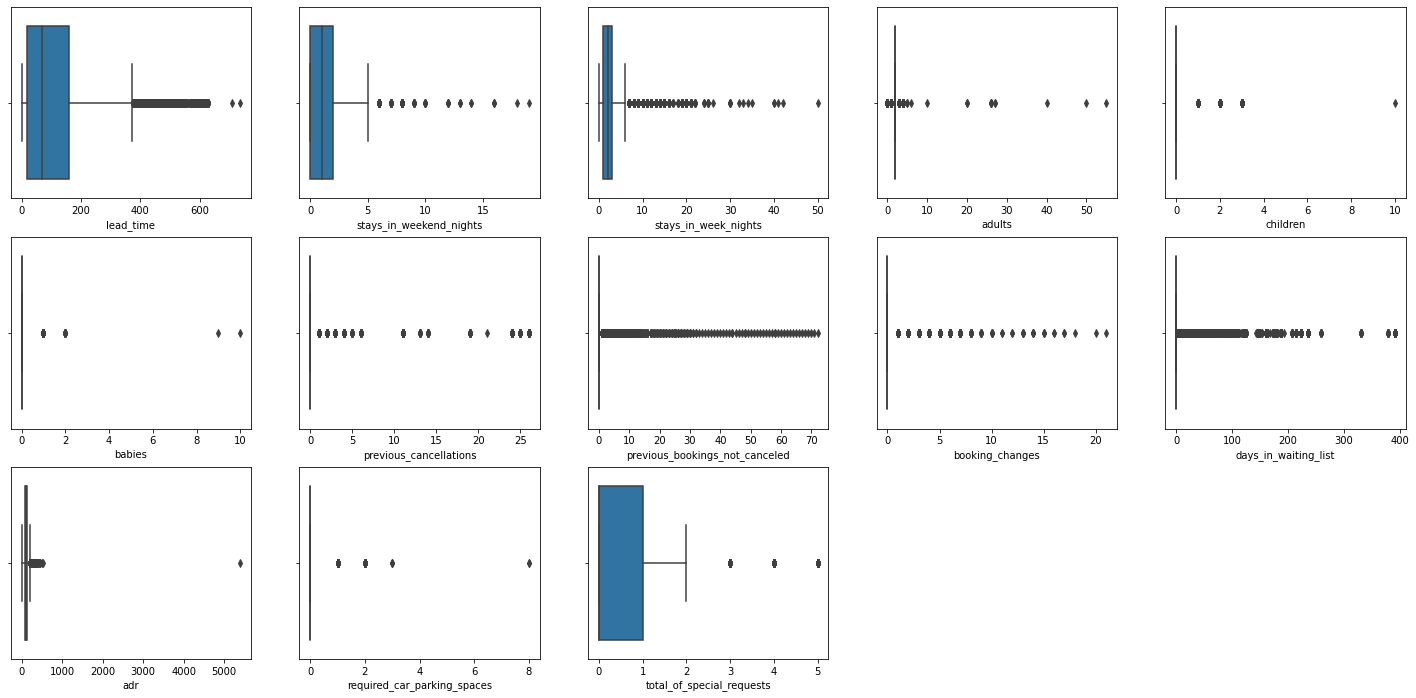

In [13]:
box_plot_vars = reservations.dtypes[(reservations.dtypes == 'int64') | (reservations.dtypes == 'float64')]
box_plot_vars.drop(["is_canceled", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month"], inplace=True)

plt.figure(figsize=(25,12))
for n, item in enumerate(box_plot_vars.items(), start=1):
  sns.boxplot(x=reservations[item[0]], ax = plt.subplot(3,5,n))

# Data Cleaning

Prendendo in considerazione la describe è possibile già fare del data cleaning, al fine di non considerare istanze non valide all'interno dell'analisi:
- casi in cui non è presente nessun adulto, in quanto non è possibile effettuare una prenotazione a nome di un minore. (Emerso da ricerche sull'età minima per effettuare il check-in nella maggiorparte degli alberghi in Portogallo)
- adr nullo o negativo: in quanto la tariffa deve essere > 0.

In [14]:
reservations.drop(reservations[reservations.adults == 0].index, axis=0, inplace=True)

In [15]:
reservations.drop(reservations[reservations.adr <= 0].index, axis=0, inplace=True)

Vediamo dalla describe che in `adr` è presente un valore massimo anomalo rispetto alla distribuzione, 5400 euro. Questo può far pensare ad un errore di inserimento.

Quindi, vediamo quante prenotazioni con `adr` superiore a 800 euro (800 euro giornalieri sono già una cifra altissima) sono presenti.

In [16]:
reservations[reservations.adr > 800]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


Come possiamo vedere è presente solo quella istanza da 5400 euro. Quindi, possiamo procedere alla cancellazione.

In [17]:
reservations.drop(reservations[reservations.adr > 800].index, axis=0, inplace=True)

Per quanto riguarda gli altri valori molto alti rispetto alla distribuzione, per ora vengono mantenuti in quanto ritengo siano utili al training del modello per il fatto che non portano informazioni discordanti con ciò che accade nella realtà.. Ad esempio notiamo che anche se abbiamo poche istanze con `lead_time` sopra a 600, possiamo vedere che in queste vi è un alta concentrazione di cancellazioni come è normale aspettarsi. 

Quindi almeno per ora questi dati verranno mantenuti.

Controllo la presenza di evenutali valori Nan.



In [18]:
reservations.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              467
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15374
company         

In [19]:
reservations["children"].fillna(0, inplace=True)

Visto che la colonna company presenta praticamente tutti valori Nan, provvedo ad eliminarla.

Inoltre, tenendo in considerazione che non è obiettivo dell'agenzia far si che il proprio cliente cancelli la prenotazioni e tenendo in considerazione che sono presenti tantissime agenzie, le quali nella maggiorparte dei casi presentano un numero di prenotazioni molto basso (tranne l'agenzia 9) scarto anche questa colonna.

In [20]:
reservations.drop(columns=["company", "agent"], inplace=True)

Sono presenti 467 valori Nan per la variabile `country`.
Per questi andrò a creare una nuova categoria `"Not specified"` in modo tale da non dover scartare i dati.

In [21]:
reservations["country"] = reservations.country.astype("object").fillna("Not specified").astype("category")

Ricontrollo la presenza di valori Nan.

In [22]:
reservations.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Visto che nel caricamento dei dati le colonne categoriche sono state caricate come tali, ora occorre aggiornare l'indice interno delle varie categorie, in modo che successivamente metodi come `value_counts()` non mostrino categorie con 0 elementi.
Pandas non fornisce tale metodo, perciò effettuerò l'aggiornamento manualmente.

In [23]:
for column in reservations.columns[reservations.dtypes == "category"]:
  reservations[column] = reservations[column].astype("object").astype("category")

In [24]:
reservations.shape

(117181, 30)

In [25]:
reservations.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000
mean,0.374873,105.052671,2016.160120,27.137505,15.800932,0.935988,2.520340,1.864568,0.100972,0.007860,0.087113,0.125498,0.215564,2.342905,103.534202,0.062723,0.570152
std,0.484092,106.929249,0.706869,13.572691,8.783487,0.994759,1.890727,0.474946,0.391291,0.097141,0.849569,1.447489,0.630475,17.695496,46.713471,0.245717,0.791169
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


# Analisi esplorativa

Dopo aver ripulito i dati, procedo con l'analisi esplorativa.

Visto che il problema ha l'obiettivo di prevedere la cancellazione delle prenotazioni, verifichiamo se all'interno del dataset le classi sono sbilanciate o meno.

In [26]:
reservations["is_canceled"].value_counts()

0    73253
1    43928
Name: is_canceled, dtype: int64

Visualizzo un grafico a torta

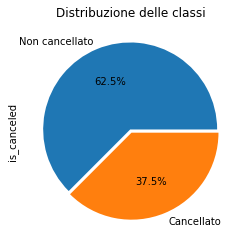

In [27]:
labels = ["Non cancellato", "Cancellato"]
reservations["is_canceled"].value_counts().plot.pie(autopct="%.1f%%", explode=[0.02] * 2, labels = labels);
plt.title("Distribuzione delle classi");

Come si può notare più facilmente dal grafico a torta, le classi non sono perfettamente bilanciate, perciò sicuramente si potranno prendere in considerazione tecniche per effettuare il bilanciamento.

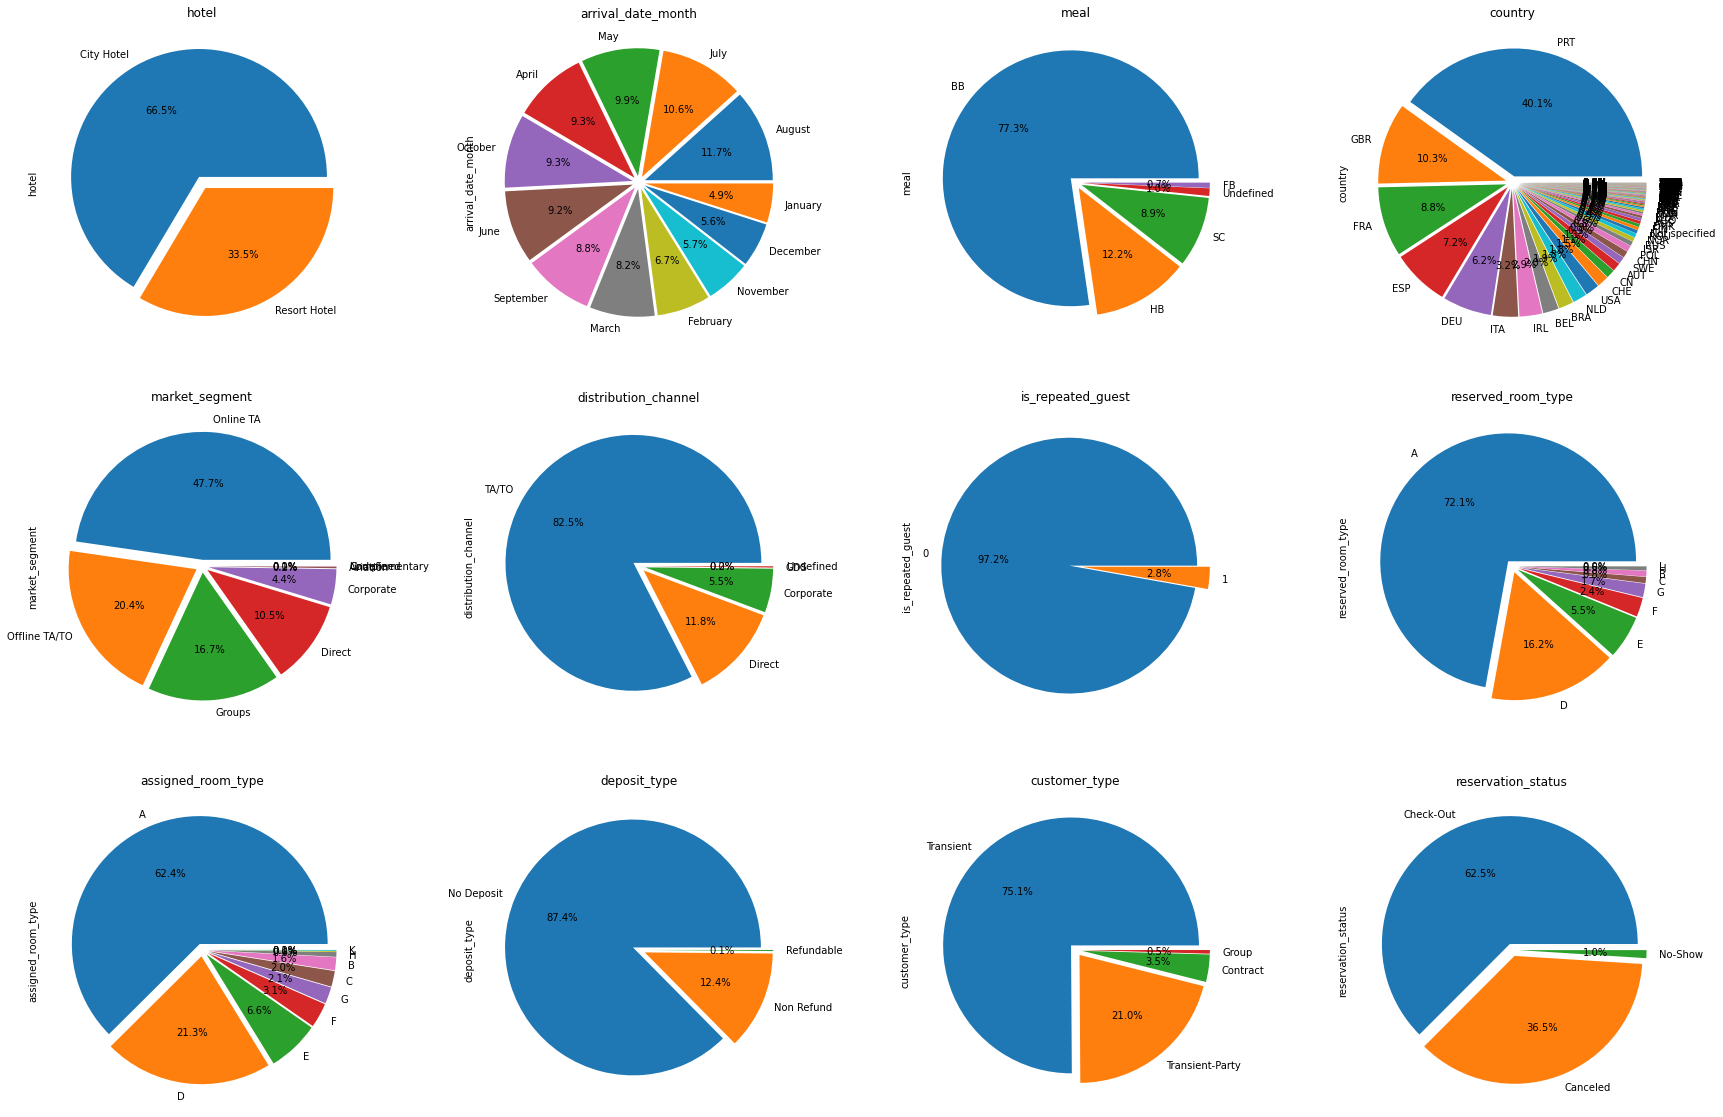

In [28]:
plt.figure(figsize = (30,20))
category_columns = reservations.columns[reservations.dtypes == "category"]
for n, column in enumerate(category_columns, start=1):
  reservations[column].value_counts().plot.pie(autopct="%.1f%%", explode=[0.05] * reservations[column].nunique(), ax=plt.subplot(3,4,n), title=column)

Dai grafici appena prodotti si può notare che:
- All'interno del dataset sono presenti più prenotazioni per l'hotel in città, rispetto al resort
- Le prenotazioni sono presenti in modo abbastanza equo durante tutto l'anno, con una leggera prevalenza nei mesi più caldi. Visto questo fenomeno, al fine di ottenere dati più significativi, si potrebbe pensare di raggruppare i mesi per stagioni e vedere la loro correlazione con le prenotazioni. (Applicando la tecnica del Binning)
- Prevalgono le prenotazioni in cui si sfrutta solamente il servizio di Bed & Breakfast
- Ovviamente, essendo in Portogallo, prevalgono le prenotazioni proviente da questo paese. Per questo motivo, si potrebbe pensare di applicare la tecnica del Binning e raggrupparli per "Portogallo", "Paesi Esteri Europei", e "Paesi Esteri non Europei" e "Non specificato".
- Le agenzie di viaggio prevalgono nelle prenotazioni.
- Pochi clienti erano già stati precedentemente registrati. Infatti, solo una percentuale veramente bassa, 2.8%, era già registrato.
- Le prenotazioni vertono più sul tipo di stanza A, però non sapendo il significato di quest'ultime sigle, non possiamo dire tanto sul perchè. Si potrebbe verificare le differenze tra le stanze prenotate e quelle effettivamente assegnate, mettendole in relazione con le cancellazioni.
- La maggiorparte delle prenotazioni non prevede una caparra.
- Infine, il 75.1% dei clienti non è legato né ad un contratto né ad un gruppo.

In [29]:
month_to_season = {
    "January": "Winter",
    "February": "Winter",
    "March": "Spring",
    "April": "Spring",
    "May": "Spring",
    "June": "Summer",
    "July": "Summer",
    "August": "Summer",
    "September": "Autumn",
    "October": "Autumn",
    "November": "Autumn",
    "December": "Winter"
}

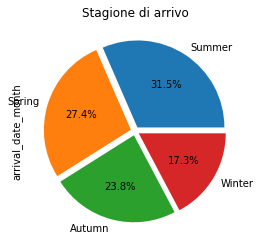

In [30]:
reservations.arrival_date_month.map(month_to_season).value_counts().plot.pie(autopct="%.1f%%", explode=[0.05] * 4);
plt.title("Stagione di arrivo");

In Primavera ed in Estate sono presenti più prenotazioni.

Provo a raggruppare le nazioni per:
- Portogallo (non lo metto tra gli europei in quanto, essendo in Portogallo considero di rilievo i turisti interni)
- Europei
- Non europei
- Non specificato

In [31]:
check_eu = reservations.country.isin(countrygroups.EUROPEAN_UNION)
check_eu = check_eu.map({False : "Not European", True : "European"})
check_eu[reservations.country == "PRT"] = "PRT"
check_eu[reservations.country == "Not specified"] = "Not specified"
check_eu = check_eu.astype("category")

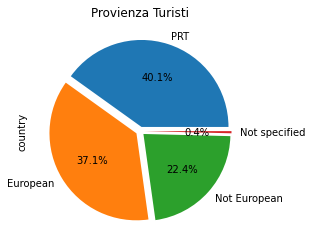

In [32]:
check_eu.value_counts().plot.pie(autopct="%.1f%%", explode=[0.05] * check_eu.nunique());
plt.title("Provienza Turisti");

In [33]:
list(reservations.reserved_room_type.unique())

['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B']

In [34]:
list(reservations.assigned_room_type.unique())

['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K']

In [35]:
agreed_room = reservations.reserved_room_type.astype("object") == reservations.assigned_room_type.astype("object")

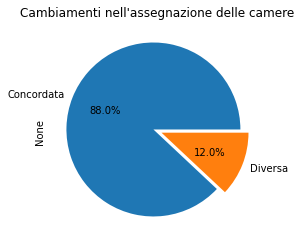

In [36]:
agreed_room.value_counts().plot.pie(autopct="%.1f%%", explode=[0.05] * 2, labels = ["Concordata", "Diversa"]);
plt.title("Cambiamenti nell'assegnazione delle camere");

Ora procedo ad analizzare le principali variabili numeriche.

In [37]:
list(reservations.columns[reservations.dtypes != "category"].drop(["is_canceled", "reservation_status_date"]))

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

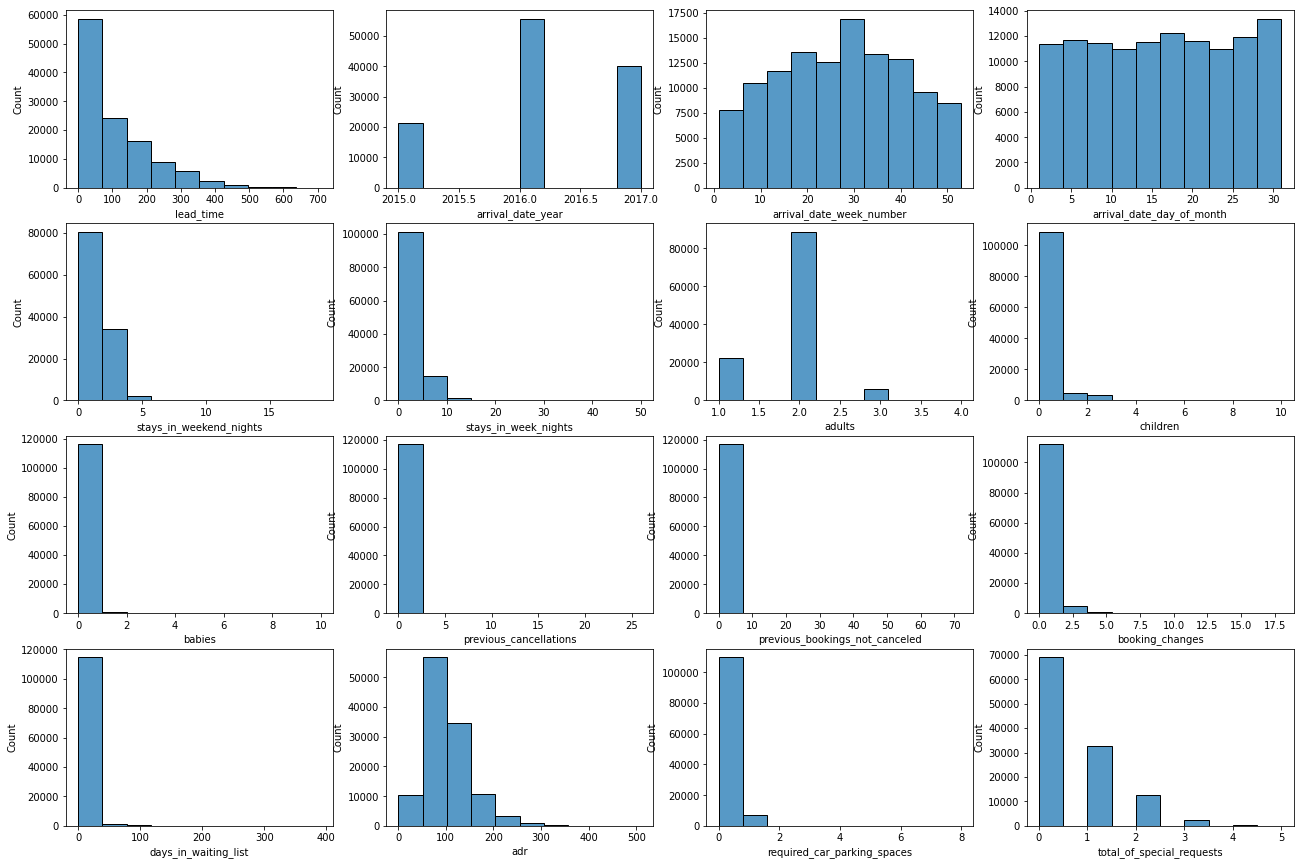

In [38]:
plt.figure(figsize=(22,15))
for n, column in enumerate(list(reservations.columns[reservations.dtypes != "category"].drop(["is_canceled", "reservation_status_date"])), start=1):
  sns.histplot(reservations, x=column, bins=10, ax=plt.subplot(4,4,n));

Come si può vedere da questi istogrammi la maggiorparte delle variabili: `lead_time`, `stays_in_weekend_nights`, `stays_in_week_nights`, `children`, `babies`, `previuos_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_parking_space`, `total_of_special_requests`, al crescere del valore diminuiscono in numero. 
Alcune di queste visualizzazioni come ad esempio, `previous_bookings_not_canceled`, `days_in_waiting_list`, risentono nella visualizzazione degli outliers. Questi verranno presi in considerazione nelle fasi successive.

Mentre per quanto riguarda `arrival_date_week_number` si può notare il fenomeno che avevamo già notato analizzando le stagioni, cioè che nei mesi estivi sono presenti più prenotazioni. Sicuramente il significato di `arrival_date_week_number` è molto legato alla stagione, quindi successivamente occorrerà scegliere cosa mantenere.

Si nota una prevelanza di prenotazioni con 2 adulti. 
Il massimo di adulti registrato è 4, in quanto il valore 55 registrato precedentemente come massimo era un'istanza non valida possedendo un valore adr negativo.

Per quanto riguarda `adr`, vi è una prevalenza di tariffe giornaliere che vanno dai 50 ai 100 euro.
Si nota anche un basso numero di prenotazioni con adr inferiore a 50 euro.
Le tariffe diminuiscono in numero con l'aumentare del prezzo (oltre i 100 euro).


Inoltre, si può osservare che il giorno di arrivo (`arrival_date_day_of_month`) ha una distribuzione abbastanza omogenea.

Visto che si può notare una maggior concentrazione di prenotazioni nei mesi estivi, visualizzo il numero di ospiti per mese all'interno del city hotel e del resort. 

In [39]:
#month_order = {'January' : 0, 'February' : 1, 'March' : 2, 'April' : 3, 'May' : 4, 'June' : 5, 'July' : 6, 'August' : 7, 'September' : 8, 'October' : 9, 'November' : 10, 'December' : 11}
hotel_month = reservations[reservations.is_canceled == 0].groupby(["hotel", "arrival_date_month"])
hotel_month_count = hotel_month.count()
n_guests = hotel_month_count.adults + hotel_month_count.children + hotel_month_count.babies
n_guests = pd.DataFrame(n_guests)
n_guests.columns = ["guests"]
#n_guests = n_guests.reset_index().set_index("hotel")
#n_guests["arrival_date_month"] = n_guests["arrival_date_month"].astype("category")
#n_guests["month_number"] = n_guests.arrival_date_month.map(month_order).astype("int8")
#n_guests.sort_values(by="month_number", inplace=True)
#n_guests = n_guests.reset_index().set_index(["hotel", "arrival_date_month"])
#n_guests.drop(columns=["month_number"], inplace=True)

In [40]:
resort_guests = n_guests.loc["Resort Hotel"].reset_index()
resort_guests.columns = ["month", "guests"]
resort_guests

,month,guests
0,April,7479
1,August,9639
2,December,5781
3,February,6768
4,January,5433
5,July,9246
6,June,6003
7,March,7545
8,May,7422
9,November,5754


In [41]:
city_guests = n_guests.loc["City Hotel"].reset_index()
city_guests.columns = ["month", "guests"]
city_guests

,month,guests
0,April,11826
1,August,15738
2,December,6789
3,February,8925
4,January,6540
5,July,13986
6,June,12852
7,March,11937
8,May,13401
9,November,7818


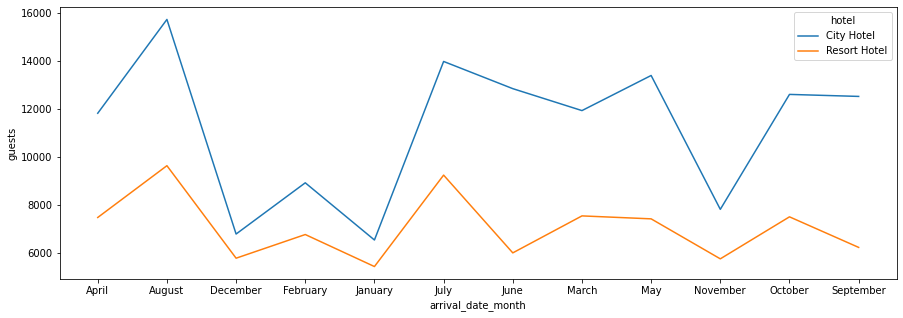

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(data=n_guests, x="arrival_date_month", y="guests", hue="hotel");

Inoltre visualizzo anche l'adr nei vari mesi

In [43]:
hotel_month = reservations[reservations.is_canceled == 0].groupby(["hotel", "arrival_date_month"])
adr_month_means = pd.DataFrame(hotel_month["adr"].mean())
adr_month_means.columns = ["mean_adr"]

In [44]:
adr_month_means_resort = adr_month_means.loc["Resort Hotel"].reset_index()
adr_month_means_resort.columns = ["month", "mean_adr"]
adr_month_means_resort

,month,mean_adr
0,April,77.602459
1,August,183.687392
2,December,71.498677
3,February,55.395559
4,January,50.241999
5,July,152.801548
6,June,109.917426
7,March,58.329825
8,May,78.547660
9,November,50.153764


In [45]:
adr_month_means_city = adr_month_means.loc["City Hotel"].reset_index()
adr_month_means_city.columns = ["month", "mean_adr"]
adr_month_means_city

,month,mean_adr
0,April,113.614899
1,August,121.087798
2,December,92.430884
3,February,88.474013
4,January,84.715459
5,July,118.135133
6,June,119.679125
7,March,92.139678
8,May,123.184130
9,November,89.252195


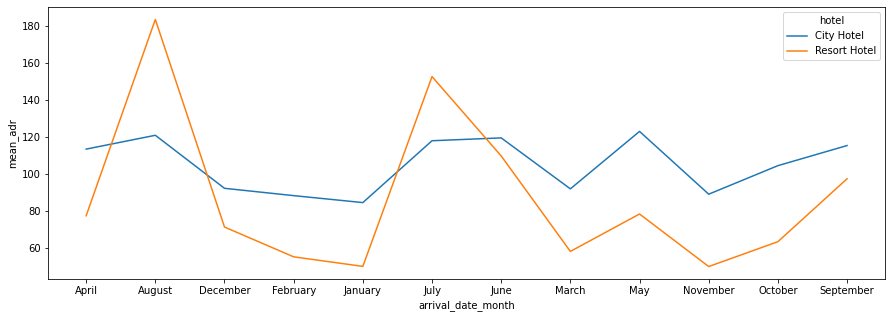

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=adr_month_means, x="arrival_date_month", y="mean_adr", hue="hotel");

Notiamo che i prezzi del resort sono più bassi rispetto ai prezzi dell'hotel in città durante l'inverno, mentre sono più alti nei mesi estivi di punta.
Questo sottolinea il fatto che molto probabilmente il resort è una meta più ambita e che può offrire di più nei mesi più caldi.

## Relazioni tra variabili e output

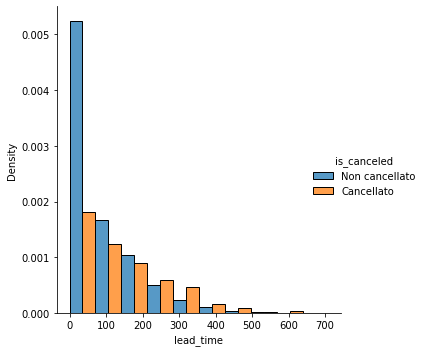

In [47]:
g = sns.displot(reservations, x="lead_time", hue="is_canceled", bins=10, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Analizzando il lead_time, la quale era: numero di giorni tra la prenotazione all'interno del PMS(Property Management System) e la presunta data di arrivo, si può notare che dai 220 giorni in poi il numero di prenotazioni cancellate supera quello delle prenotazioni non cancellate. 
Questo è legato anche al concetto che chi prenota una vacanza troppo presto è più esposto a problematiche di impegni o imprevisti che sorgono nel tempo, che poi li portano ad annullare una vacanza.

Nel grafico precedente ho anche normalizzato i dati attraverso `stat="density"` al fine di apprezzare maggiormente le differenze.

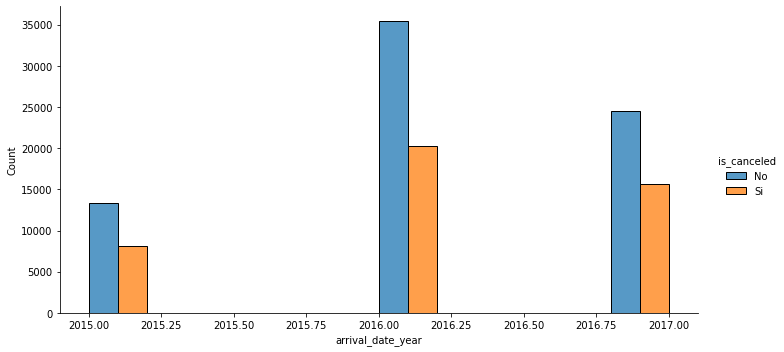

In [48]:
g = sns.displot(reservations, x="arrival_date_year", hue="is_canceled", bins=10, multiple="dodge", height=5, aspect=2);
for t, l in zip(g._legend.texts, ["No", "Si"]): t.set_text(l)

Si nota che in tutti e tre gli anni presenti nel dataset, non cambia di tanto la distribuzione tra cancellati e non.

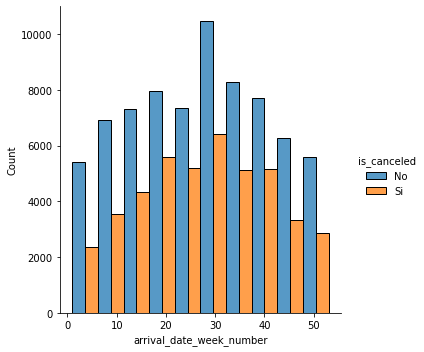

In [49]:
g = sns.displot(reservations, x="arrival_date_week_number", hue="is_canceled", bins=10, multiple="dodge");
for t, l in zip(g._legend.texts, ["No", "Si"]): t.set_text(l)

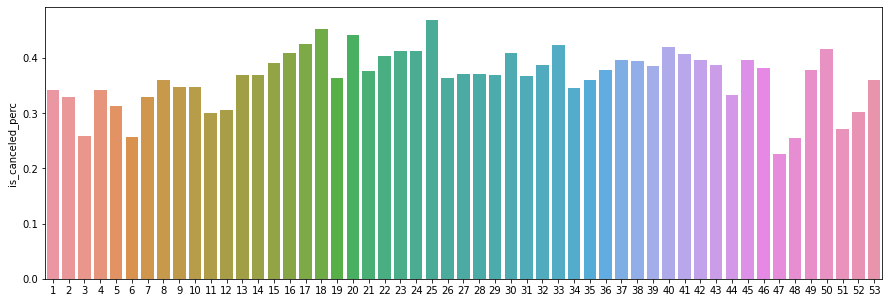

In [50]:
perc_cancelations = pd.DataFrame(reservations.groupby(["arrival_date_week_number"])["is_canceled"].mean(), index=reservations.arrival_date_week_number.unique())
perc_cancelations.rename(columns = {"is_canceled" : "is_canceled_perc"}, inplace=True)
perc_cancelations.sort_index(inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x=perc_cancelations.index, y=perc_cancelations.is_canceled_perc);

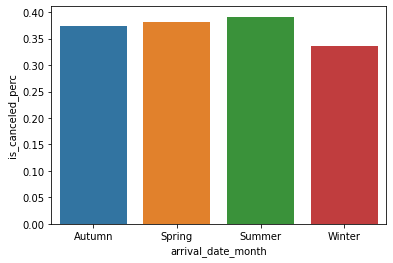

In [51]:
season_perc_cancelations = pd.DataFrame(reservations.groupby(reservations.arrival_date_month.map(month_to_season))["is_canceled"].mean())
season_perc_cancelations.rename(columns = {"is_canceled" : "is_canceled_perc"}, inplace=True)
sns.barplot(x=season_perc_cancelations.index, y=season_perc_cancelations.is_canceled_perc);

Analizzando il numero della settimana di arrivo notiamo che la percentuale di cancellazioni è abbastanza omogenea, con picchi nella 25esima settimana e minimi nella 47-esima.

Tutto ciò invece non si nota così tanto se lo si osserva dal punto di vista delle stagioni, in cui la percentuale di cancellazioni è omogenea.

Però comunque sia, non sembra ci sia una stagione o in generale una prevalenza di settimane in cui le cancellazioni sono di tanto maggiori.

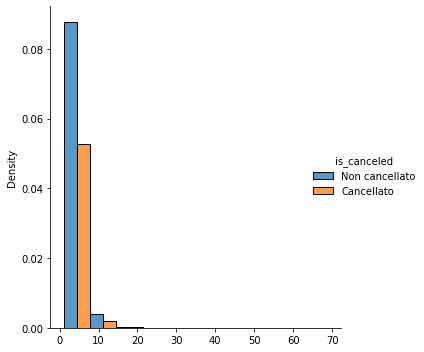

In [52]:
nights = reservations.stays_in_week_nights + reservations.stays_in_weekend_nights
g = sns.displot(x=nights.values, hue=reservations.is_canceled, bins=10, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Per comodità sommo il numero di notti week e il numero di notti nel weekend, ma la percentuale di prenotazioni cancellate non cambia (anche se ovviamente al crescere di notti ci saranno meno prenotazioni)

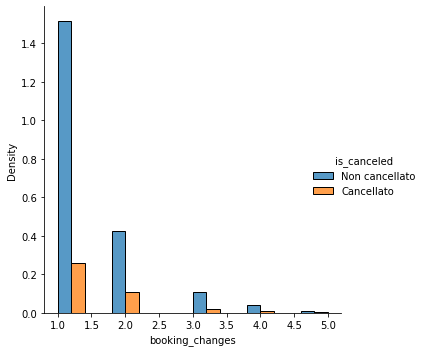

In [53]:
upper = reservations.booking_changes.quantile(0.999)
lower = reservations.booking_changes.quantile(0.05)
g = sns.displot(x=reservations.booking_changes[(reservations.booking_changes < upper) & (reservations.booking_changes > lower)], hue=reservations.is_canceled, bins=10, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Si nota che anche se aumentano il numero di cambiamenti, non si ha una variazione significativa del numero di cancellazioni.

Ho eliminato gli outliers (i quali sono in quantità veramente piccole) in quanto altrimenti non si apprezzerebbe il grafico.

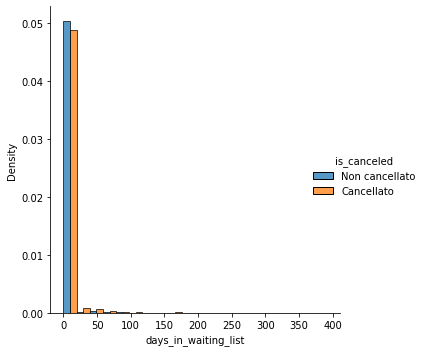

In [54]:
g = sns.displot(reservations, x="days_in_waiting_list", hue="is_canceled", bins=20, multiple="dodge", stat="density", common_norm=False);
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Come avevamo osservato precedentemente la maggiorparte delle prenotazioni non rimane all'interno della waiting list per più di 20 giorni.
Si può vedere che infatti nei primi 20 giorni sono più quelli non cancellati di quelli cancellati. Però, più si rimane all'interno della waiting list, più il numero di cancellazioni sale rispetto a quelli non cancellati. 

Perciò possiamo dedurre che alla clientela non piace aspettare e in molti casi finiscono per cancellare la prenotazione.

Anche qui notiamo la presenza di outliers.

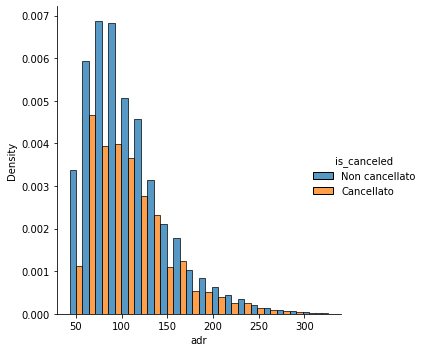

In [55]:
upper = reservations.adr.quantile(0.999)
lower = reservations.adr.quantile(0.05)
g = sns.displot(x=reservations.adr[(reservations.adr < upper) & (reservations.adr > lower)], hue=reservations.is_canceled, bins=20, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Per quanto riguarda la tariffa media giornaliera possiamo vedere che quando la tariffa è molto bassa <= 50, le prenotazioni cancellate sono molte meno, mentre salendo, aumentano.

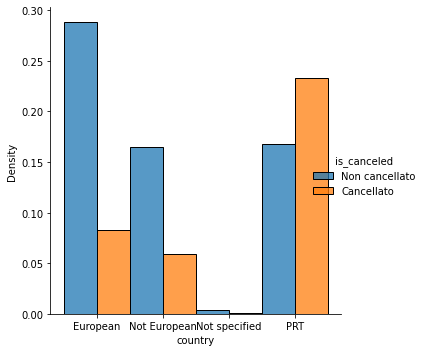

In [56]:
g = sns.displot(x=check_eu, hue=reservations.is_canceled, bins=4, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Al fine di verificare le cancellazioni per ogni nazione, utilizziamo la suddivisione fatta precedentemente in: "PRT", "European", "Not European" e "Not specified" altrimenti non sarebbe apprezzabile all'interno del grafico.

Possiamo notare che gli stessi Portoghesi sono più portati a cancellare le prenotazioni rispetto a chi viene dall'estero. 
Questo sicuramente è legato al fatto che una persona che viene dall'estero oltre alla stanza prenota anche un aereo ecc.., quindi teoricamente è più sicuro del viaggio che sta per intraprendere.

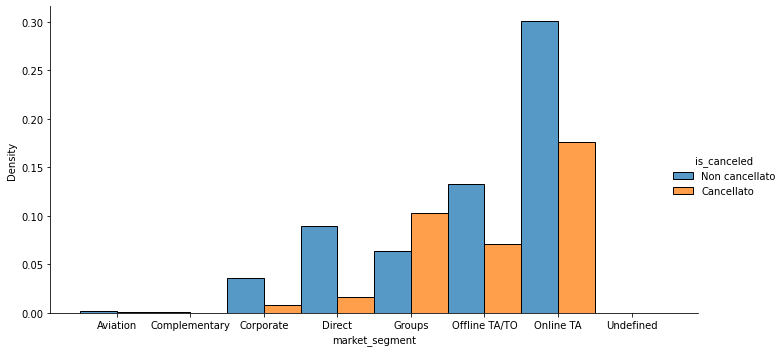

In [57]:
g = sns.displot(data=reservations, x="market_segment", hue="is_canceled", multiple="dodge", stat="density", height=5, aspect=2);
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Si può notare che il segmento di vendita diretta e corporate portano con sé minori cancellazioni.

Invece Groups, é l'unico che ha piú cancellazioni.

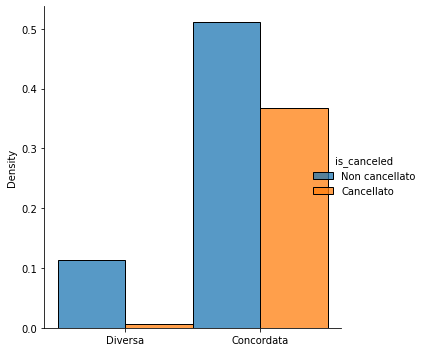

In [58]:
g = sns.displot(x=agreed_room.map({True:"Concordata", False:"Diversa"}), hue=reservations.is_canceled, multiple="dodge", stat="density");
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

Confrontando la situazione in cui è stata assegnata la stessa tipologia di camera prenotata con la situazione in cui viene assegnata una camera diversa da quella prenotata emerge che quando é la stessa é piú frequente che la prenotazione venga cancellata.

Però, considerando le distribuzioni dei valori viste prima, il numero di prenotazioni con stanza uguale a quella prenotata è di molto maggiore rispetto a quelle in cui la stanza viene cambiata.

Visto che il fatto che la stanza sia cambiata può essere dovuto sia a situazioni di overbooking, sia a situazioni in cui sia il cliente a richiederlo, ma che all'interno del dataset non vi è indicato quando siamo in un contesto o nell'altro, suppongo che siano più i casi in cui il cambiamento è concordato oppure casi in cui venga data una stanza di maggior prestigio.
Questo perchè solitamente un cambio di stanza con una peggiore (rispetto alla tipologia) non è considerato come un elemento positivo.

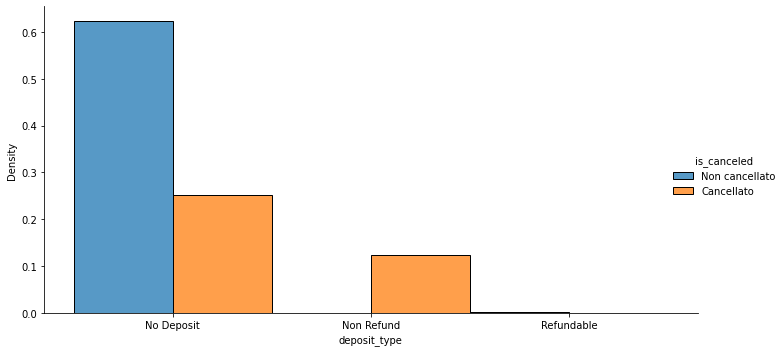

In [59]:
g = sns.displot(data=reservations, x="deposit_type", hue="is_canceled", multiple="dodge", stat="density", height=5, aspect=2);
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

In [60]:
reservations.groupby(["deposit_type", "is_canceled"]).size()

deposit_type  is_canceled
No Deposit    0              73034
              1              29399
Non Refund    0                 93
              1              14493
Refundable    0                126
              1                 36
dtype: int64

All'interno del dataset come si è potuto notare precedentemente la maggiorparte delle prenotazioni sono senza acconto, quindi il numero questo grafico potrebbe non rappresentare bene la situazione reale.
Infatti, vediamo che in "Non Refaund", cioè il caso in cui sia stato effettuato un pagamento uguale o superiore al costo di soggiorno, il numero di cancellazioni è di molto più alto rispetto alle prenotazioni andate a buon fine... Questi clienti hanno perso tutti i soldi, nonostante ciò questo accade.

Si potrebbe analizzare a quanto ammonta la media dei pseudo-clienti che hanno cancellato la prenotazione perdendo la somma versata.

In [61]:
non_refunds = reservations.loc[reservations.deposit_type == "Non Refund"]
nights = non_refunds.stays_in_week_nights + non_refunds.stays_in_weekend_nights
print(f"Media: {(nights * non_refunds.adr).mean()}; Mediana: {(nights * non_refunds.adr).median()}")

Media: 247.91216920334614; Mediana: 210.0


Considerando il conteggio dei giorni, come il conteggio delle sole notti e moltiplicando per il rispettivo adr, notiamo che in media le persone con `deposit_type` "Non Refund" hanno perso 248 euro.

La situzione continua ad apparirmi strana, quindi durante il data cleaning prenderò in considerazione anche questo fatto. 
In quanto, a mio avviso, potrebbe si lavorare bene su questo dataset (che presenta appunto questo forte sbilanciamento), però potrebbe non generalizzare bene in generale, con dati completamente nuovi.

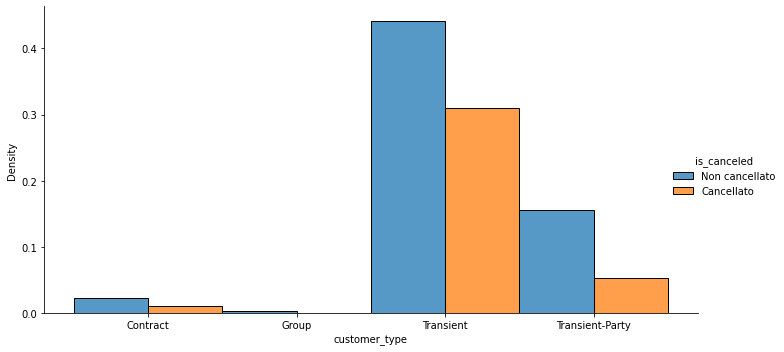

In [62]:
g = sns.displot(data=reservations, x="customer_type", hue="is_canceled", multiple="dodge", stat="density", height=5, aspect=2);
#Imposto le label della legenda
for t, l in zip(g._legend.texts, ["Non cancellato", "Cancellato"]): t.set_text(l)

# Elaborazione delle features

## Trasformazione delle variabili

Qui andrò ad applicare delle modifiche alle variabili al fine di aumentarne il significato e per quanto riguarda le variabili categoriche al fine di limitare il numero di categorie (Binning).

Dopo aver applicato queste trasformazioni e averle binarizzate, potrò effettivamente verificare la correlazione tra le variabili.

In [63]:
reservations["arrival_season"] = reservations.arrival_date_month.map(month_to_season).astype("category")

In [64]:
check_eu = reservations.country.isin(countrygroups.EUROPEAN_UNION)
check_eu = check_eu.map({False : "Not European", True : "European"})
check_eu[reservations.country == "PRT"] = "PRT"
check_eu[reservations.country == "Not specified"] = "Not specified"
check_eu = check_eu.astype("category")

reservations["country_type"] = check_eu

In [65]:
reservations["stays_nights"] = reservations.stays_in_week_nights + reservations.stays_in_weekend_nights

In [66]:
reservations["weekend_nights"] = reservations.stays_in_weekend_nights > 0

Come abbiamo visto dal grafico, più che i giorni di attesa, abbiamo visto che oltre ad un certo valore di giorni all'interno della lista di attesa, le cancellazioni iniziavano ad aumentare.
Quindi creo una colonna che mi dice se la prenotazione è stata accettata con un tempo superiore alla media.

In [67]:
reservations["waiting_over_mean"] = reservations.days_in_waiting_list > reservations.days_in_waiting_list.mean()

In [68]:
reservations["agreed_room_type"] = reservations.reserved_room_type.astype("object") == reservations.assigned_room_type.astype("object")

## Eliminazione colonne

Vista l'introduzione di variabili derivate da quelle già presenti, vado ad eliminare le variabili base, al fine di limitare il numero di variabili totali e limitare fenomeni di collinearità.

Inoltre rimuovo anche `reservation_status` e `reservation_status_date` in quanto non è ovviamente possibile saperli a priori.

In [69]:
column_to_drop = ["arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month",
                  "stays_in_weekend_nights", "stays_in_week_nights", "country", "reserved_room_type", "assigned_room_type",
                  "days_in_waiting_list", "reservation_status", "reservation_status_date"]
reservations.drop(columns=column_to_drop, inplace=True)

In [70]:
reservations.head()

,hotel,is_canceled,lead_time,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_season,country_type,stays_nights,weekend_nights,waiting_over_mean,agreed_room_type
2,Resort Hotel,0,7,1,0.0,0,BB,Direct,Direct,0,0,0,0,No Deposit,Transient,75.0,0,0,Summer,Not European,1,False,False,False
3,Resort Hotel,0,13,1,0.0,0,BB,Corporate,Corporate,0,0,0,0,No Deposit,Transient,75.0,0,0,Summer,Not European,1,False,False,True
4,Resort Hotel,0,14,2,0.0,0,BB,Online TA,TA/TO,0,0,0,0,No Deposit,Transient,98.0,0,1,Summer,Not European,2,False,False,True
5,Resort Hotel,0,14,2,0.0,0,BB,Online TA,TA/TO,0,0,0,0,No Deposit,Transient,98.0,0,1,Summer,Not European,2,False,False,True
6,Resort Hotel,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,0,No Deposit,Transient,107.0,0,0,Summer,PRT,2,False,False,True


Ora che ho una prima versione delle feature, posso provare a verificare la correlazione.
Andrò a verificarla in modo separato per le variabili numeriche e per le variabili categoriche:
- per le numeriche, applicherò Pearson
- per le categoriche, applicherò Spearman andando a passare ogni colonna per il filtro LabelEncoder. Il LabelEncoder verrà utilizzato solo ora per verificare in modo approssimato la correlazione, ma successivamente utilizzerò la tecnica del One Hot Encoding. Applico ora il LabelEncoder per motivi di dimensionalità nella visualizzazione della correllazione che mi renderebbe molto difficile fare analisi.

In [71]:
pearson_corr_column = ["is_canceled","lead_time", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled",
                     "booking_changes", "adr", "required_car_parking_spaces", "total_of_special_requests", "stays_nights", "weekend_nights", "waiting_over_mean",
                     "agreed_room_type"]
spearman_corr_column = list(reservations.columns[~reservations.columns.isin(pearson_corr_column)]) + ["is_canceled"]

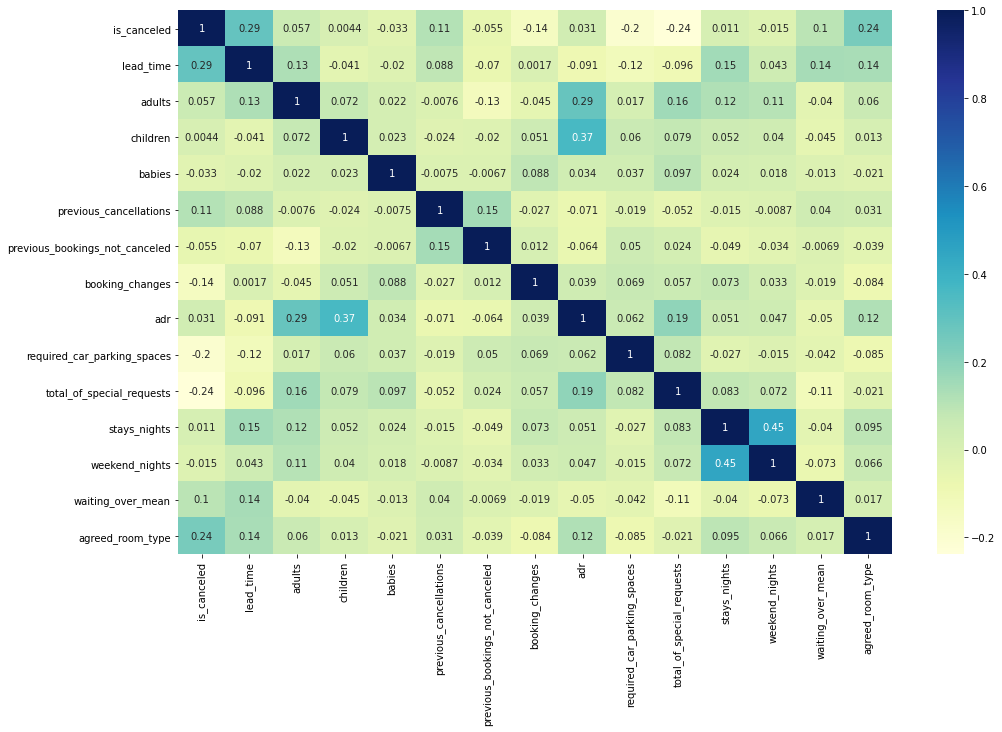

In [72]:
plt.figure(figsize=(16,10))
sns.heatmap(reservations[pearson_corr_column].corr(method = 'pearson'), annot = True, cmap = "YlGnBu");

Rispetto alla variabile da predire `is_canceled` è presente una buona correlazione con la feature `lead_time` come avevamo visto anche in analisi.
Inoltre, abbiamo piccole correlazioni anche con `previous_cancellations`, `booking_changes`, `required_car_parking_spaces`, `total_of_special_requests` e con le due variabili introdotte `waiting_over_mean` e `agreed_room_type`.

Inoltre si possono notare anche fenomeni di collinearità.
Infatti si vede come `weekend_nights` e `stays_nights` introdotte da me, abbiano un alta correlazione ed inoltre si vede anche come `adr` sia correlato ad `adults` e `children`. Queste verranno attenuate grazie alla regolarizzazione.

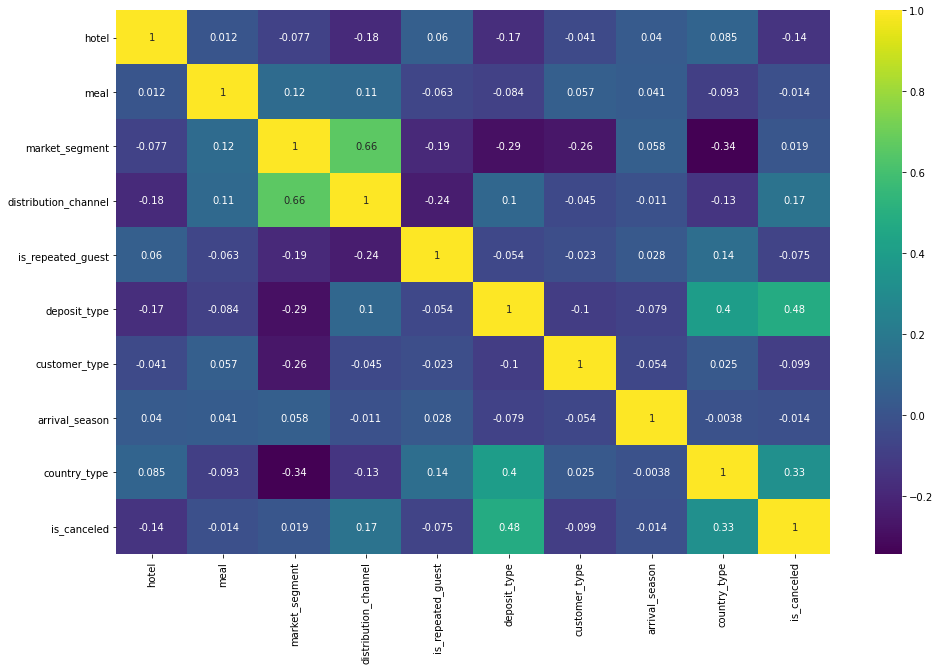

In [73]:
label_encoder = LabelEncoder()
reservations_copy = reservations.copy()
for column in spearman_corr_column:
  reservations_copy[column] = label_encoder.fit_transform(reservations[column])
  
plt.figure(figsize=(16,10))
sns.heatmap(reservations_copy[spearman_corr_column].corr(method = 'spearman'), annot = True, cmap = "viridis");

Per quanto riguarda le variabili categoriche, abbiamo che la variabile introdotta `country_type` lavora molto bene e presenta una buona correlazione. 
Inoltre, abbiamo `hotel`, `distribution_channel` che presentano piccole correlazioni come visto anche durante la fase d'analisi.
Si nota un'alta correlazione con `deposit_type` come notato anche in analisi, però anche qui è da verificare se è un approccio che generalizza bene.

## Standardizzazione e discretizzazione delle features

Visto che le variabili numeriche presentano scale diverse è opportuno effettuare la standardizzazione.
Inoltre, si effettua lo One Hot Encoding per le variabile categoriche al fine di poter essere processate dagli algoritmi di learning.

Innanzitutto vado a separare la X e la y.

In [74]:
X = reservations.drop(columns="is_canceled")
y = reservations["is_canceled"]

In [75]:
numeric_vars = ["lead_time", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled",
                     "booking_changes", "adr", "required_car_parking_spaces", "total_of_special_requests", "stays_nights"]

In [76]:
binary_vars = ["is_repeated_guest", "weekend_nights", "waiting_over_mean", "agreed_room_type"]

In [77]:
categorical_vars = list(X.columns[~X.columns.isin(numeric_vars + binary_vars)])

Creo un filtro ColumnTransformer in modo da poterlo utilizzare con i vari algoritmi di learning in Pipeline senza doverlo ricreare ogni volta.

Le variabili numeriche, come detto prima, vengono Standardizzate, le variabili categoriche vengono processate dal OneHotEncoder, mentre le variabili binarie vengono lasciate invariate al fine di rappresentare il massimo dell'informazione.

In [78]:
transformer = ColumnTransformer([
      ("numeric", StandardScaler() , numeric_vars),
      ("binary", "passthrough", binary_vars),
      ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_vars)
]) 

Effettuo un test del filtro

In [79]:
dataset = transformer.fit_transform(X)

Grazie al test sul filtro, vado a salvarmi le label (i nomi delle features processati dal filtro) da associare ai vari pesi generati dagli algoritmi di learning.

In [80]:
labels = numeric_vars + binary_vars + list(transformer.named_transformers_["categorical"].get_feature_names(categorical_vars))

In [81]:
dataset = pd.DataFrame(transformer.fit_transform(X), columns=labels)
dataset.head()

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,stays_nights,is_repeated_guest,weekend_nights,waiting_over_mean,agreed_room_type,hotel_City Hotel,...,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_season_Autumn,arrival_season_Spring,arrival_season_Summer,arrival_season_Winter,country_type_European,country_type_Not European,country_type_Not specified,country_type_PRT
0,-0.91699,-1.82036,-0.258049,-0.0809097,-0.102538,-0.086701,-0.341909,-0.610837,-0.255268,-0.720649,-0.970731,0,False,False,False,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,-0.860878,-1.82036,-0.258049,-0.0809097,-0.102538,-0.086701,-0.341909,-0.610837,-0.255268,-0.720649,-0.970731,0,False,False,True,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,-0.851526,0.285153,-0.258049,-0.0809097,-0.102538,-0.086701,-0.341909,-0.118472,-0.255268,0.54331,-0.575535,0,False,False,True,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,-0.851526,0.285153,-0.258049,-0.0809097,-0.102538,-0.086701,-0.341909,-0.118472,-0.255268,0.54331,-0.575535,0,False,False,True,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,-0.982454,0.285153,-0.258049,-0.0809097,-0.102538,-0.086701,-0.341909,0.074193,-0.255268,-0.720649,-0.575535,0,False,False,True,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


Decido di non applicare il transformer su tutto il dataset fin da subito per il motivo che i filtri li voglio addestrare solo sui dati di training.

## Semplice modello con Lasso per individuare le features più rilevanti

Dopo aver elaborato le features a disposizione, provo un semplice modello di Regressione Logistica con applicata la regolarizzazione Lasso al fine di scovare le feature più rilevanti per il nostro problema (prevedere la cancellazione delle prenotazioni).

Vado a creare un set di validation al fine di provare lo score su dati non utilizzati.
Inoltre per effettuare il training ottimizzando i parametri utilizzo una grid search con cross validation al fine di trovare gli iperparametri migliori.

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [83]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [84]:
%%time
model = Pipeline([
      ("transform", transformer),
      ("logreg", LogisticRegression(solver="saga", penalty="l1", random_state=42))
]) 

grid = {
    "logreg__C" : np.logspace(-9, 2, 12)
}
gs = GridSearchCV(model, grid, cv=skf, refit=True)
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

CPU times: user 2min 11s, sys: 5.45 s, total: 2min 16s
Wall time: 2min 12s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [85]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,6.010830,0.075191,0.145406,0.003847,1,{'logreg__C': 1.0},0.813748,0.809332,0.816897,0.813326,0.003103,1
11,6.197382,0.033655,0.141522,0.002095,100,{'logreg__C': 100.0},0.813633,0.809370,0.816935,0.813313,0.003097,2
10,6.084496,0.069310,0.145105,0.003267,10,{'logreg__C': 10.0},0.813594,0.809332,0.816935,0.813287,0.003112,3
8,6.033782,0.096657,0.142827,0.001745,0.1,{'logreg__C': 0.1},0.812673,0.808141,0.816014,0.812276,0.003226,4
7,6.100664,0.056478,0.144487,0.005147,0.01,{'logreg__C': 0.01},0.808295,0.805952,0.812097,0.808781,0.002532,5
6,6.201715,0.073935,0.147481,0.001919,0.001,{'logreg__C': 0.001},0.789247,0.784485,0.786790,0.786841,0.001944,6
0,0.382396,0.021685,0.149924,0.005245,1e-09,{'logreg__C': 1e-09},0.624885,0.624885,0.624885,0.624885,0.000000,7
1,0.393622,0.002573,0.145218,0.002894,1e-08,{'logreg__C': 1e-08},0.624885,0.624885,0.624885,0.624885,0.000000,7
2,0.387626,0.005376,0.148560,0.005567,1e-07,{'logreg__C': 1e-07},0.624885,0.624885,0.624885,0.624885,0.000000,7
3,0.400094,0.012657,0.148752,0.002485,1e-06,{'logreg__C': 1e-06},0.624885,0.624885,0.624885,0.624885,0.000000,7


Provo l'accuratezza sul validation set

In [86]:
gs.score(X_val, y_val)

0.8169017690279307

In [87]:
gs.best_params_

{'logreg__C': 1.0}

In [88]:
gs.classes_

array([0, 1], dtype=int64)

In [89]:
coeff = pd.Series(gs.best_estimator_.named_steps["logreg"].coef_[0], index=labels)
coeff.sort_values()

required_car_parking_spaces      -2.269614
deposit_type_No Deposit          -2.139660
deposit_type_Refundable          -1.045561
country_type_European            -0.920313
is_repeated_guest                -0.781975
country_type_Not European        -0.721761
meal_Undefined                   -0.671141
distribution_channel_GDS         -0.628873
market_segment_Corporate         -0.607387
total_of_special_requests        -0.603957
customer_type_Group              -0.580952
market_segment_Offline TA/TO     -0.564289
customer_type_Contract           -0.532126
previous_bookings_not_canceled   -0.507749
distribution_channel_Direct      -0.421379
waiting_over_mean                -0.416572
hotel_Resort Hotel               -0.397844
arrival_season_Summer            -0.397520
meal_HB                          -0.314450
market_segment_Aviation          -0.290882
hotel_City Hotel                 -0.261933
booking_changes                  -0.215464
arrival_season_Autumn            -0.168871
arrival_sea

L'unico peso azzerato è quello assegnato ad `country_type_Not specified`, ma non andremo ad elimarlo in quanto esso è una categoria della feature `country_type` estratta dal OneHotEncoding.

Osservando i coefficienti, in particolare i segni, possiamo osservare quali variabili determinano se una prenotazione verrà cancellata o meno.
I coefficienti positivi porteranno la prenotazione ad essere cancellata, mentre quelli negativi ad essere rispettata. (Come si può vedere dal comando `gs.classes_` eseguito precedentemente 0 (Not canceled) è la classe negativa, mentre 1 (Canceled) è la classe positiva)

Gli scenari che maggiormente portano una prenotazione ad essere cancellata sono:
- lead_time: come visto anche in analisi, il lead_time ha un buon peso sulle cancellazioni
- country_type_PRT: abbiamo visto anche in analisi come essere più vicini agli hotel (quindi abitare in Portogallo) pesi sulla cancellazione
- marke_segment_Online TA: prenotare attraverso agenzie di viaggio online pesa sulla cancellazione
- previous_cancellations: ovviamente se più una persona precedentemente era abituata a cancellare prenotazioni, più avremo il rischio che cancellerà anche la corrente
- agreed_room_type
- deposit_type_Non Refund: incredibilmente come abbiamo visto in analisi.

Mentre quelli che portano una prenotazione ad essere rispettata sono:
- required_car_parking_spaces: se all'interno della prenotazione vengono richiesti posti auto, questo influisce positivamente per la prenotazione (quindi spinge a non cancellarla)
- deposit_type_No Deposit   
- deposit_type_Refundable          
- country_type_European            
- is_repeated_guest: se è un cliente affezionato, sarà più probabile che la prenotazione venga rispettata          
- country_type_Not European  

Si può vedere come le persone che vengono dall'estero siano più prone a rispettare la prenotazione (sopratutto il resto d'Europa).      

## Creazione test set

Creo un **test set** con il 10% di istanze del dataset originario.

In [90]:
X_dataset, X_test, y_dataset, y_test = train_test_split(X, y, test_size=1/10, random_state=42)

In [91]:
print(f'''Shape dataset di train: {X_dataset.shape}
Shape dataset di test:  {X_test.shape}''')

Shape dataset di train: (105462, 23)
Shape dataset di test:  (11719, 23)


## Creazione validation set

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X_dataset, y_dataset, test_size = 1/3, random_state=42)

# Funzioni utili

Creo la funzione per la visualizzazione delle principali informazioni sul modello di classificazione utilizzato.

In [93]:
# Accuracy, confusion matrix...
def model_stats(X, y_real, model, nn=False):
   if nn:
      y_pred = np.argmax(model.predict(X), axis=-1)
   else:  
      y_pred = model.predict(X)

   order = ["Not canceled", "Canceled"]
   print("============= Confusion matrix =============\n")
   cm = pd.DataFrame(confusion_matrix(y_real, y_pred), index=order, columns=order)
   print(cm)
   sns.heatmap(cm, annot=True, cmap = "YlGnBu", fmt="d")
   plt.title('Confusion matrix')
   plt.ylabel('Actual label')
   plt.xlabel('Predicted label')
   plt.show() # Need to display the heatmap in place

   prec_scores = pd.Series(precision_score(y_real, y_pred, average=None), index=order)
   recall_scores = pd.Series(recall_score(y_real, y_pred, average=None), index=order)
   f1_scores = pd.Series(f1_score(y_real, y_pred, average=None), index=order)

   print("\n============= Report scores =============")
   #Print info
   print(pd.DataFrame(data = {
       "precision" : prec_scores,
       "recall" : recall_scores,
       "f1 score" : f1_scores
   }))

   #Print f1 score mean
   f1_mean = f1_score(y_real, y_pred, average="macro")
   if nn:
      y_real_cat = to_categorical(y_real)
      score = model.evaluate(X, y_real_cat)[1]
   else:
      score = model.score(X, y_real)
   print(f'''\n\nf1 score mean: {f1_mean}\nAccuracy: {score}\n''')
   return (f1_mean, score)

Creo la funzione per calcolare l'intervallo di accuratezza dei modelli proposti. \\
Utilizzo una confidenza del 95%, quindi z = 1.96 

In [94]:
def confidence_interval(N, acc):
  variation = 1.96 * ((1.96)**2 + 4 * N * acc - 4 * N * (acc)**2)**(1/2)
  first_part = 2 * N * acc + (1.96)**2
  denominator = 2*(N+(1.96)**2)
  lower = (first_part - variation)/denominator
  upper = (first_part + variation)/denominator
  return (lower, upper)

Creo la funzione per il confronto delle accuratezze tra due modelli. \\
Anche qui utilizzo la confidenza del 95%, quindi z = 1.96.


In [95]:
def compare_two_model(acc1, acc2, N1, N2):
  error1 = 1 - acc1
  error2 = 1 - acc2
  var = lambda err, N : (err * (1-err))/N
  variance = var(error1, N1) + var(error2, N2)
  d = abs(error1 - error2)
  lower_d = d - 1.96 * (variance)**(1/2)
  upper_d = d + 1.96 * (variance)**(1/2)
  return (lower_d, upper_d)

In [96]:
outer_cv = StratifiedKFold(2, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(3, shuffle=True, random_state=42)
def model_fit_nested_cv(model, grid, X, y):
    results = []
    for train_indices, val_indices in outer_cv.split(X, y):
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
        gs = GridSearchCV(model, grid, cv = inner_cv, refit=True)
        gs.fit(X_train, y_train)
        score_on_val = gs.score(X_val, y_val)
        results.append((gs.best_estimator_, gs.best_params_, score_on_val))
    
    return results

# Modelli di learning

In [97]:
y_train.value_counts()

0    43913
1    26395
Name: is_canceled, dtype: int64

Visto che le classi sono leggermente sbilanciate, si potrebbe pensare di applicare qualche tecnica per il bilanciamento: 
- pesi diversificati per le classi
- smote

Però prendendo in considerazione il fatto che all'interno del dataset sono presenti numerose istanze applicare pesi diversificati oppure SMOTE andrebbe ad aumentare i tempi di computazione necessari per i seguenti motivi:
- applicare SMOTE andrebbe ad aumentare il numero di istanze e quindi diventerebbe ancora più complicato applicare qualsiasi algoritmo sopratutto quelli che utilizzano Kernel.
- applicare pesi diversificati per le classi significherebbe dover trovare un ulteriore miglior iperparametro e quindi aumenta i tempi di calcolo.

Visto il numero alto di istanze a disposizione ed il numero comunque alto di istanze con `is_canceled` = 1 (~26000), opto per la tecnica dell'under sampling, portando entrambe le classi alla stessa cardinalità. 

In [98]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_train, y_train = rus.fit_resample(X_train, y_train)

Possiamo vedere che ora le due classi all'interno del dataset di train sono perfettamente bilanciate.

In [99]:
y_train.value_counts()

1    26395
0    26395
Name: is_canceled, dtype: int64

Creo un dizionario per salvare le statistiche principali dei modelli al fine di poterle analizzare succesivamente.

In [100]:
stats = dict()

Inoltre, per tutti i modelli andrò a selezionare gli iperparametri migliori attraverso la GridSearchCV. \\
Non applico la nested cross validation solamente perchè i tempi di computazione sono già elevati lavorando con la grid search, quindi lavorare con la nested porterebbe tempi di calcolo troppi alti per l'obiettivo del progetto (anche se alcuni modelli durante lo sviluppo li ho provati anche con la nested, ma per limitare i tempi totali di esecuzione del notebook ho preferito non lasciarla). 

## Percepton

Il primo modello che provo è il Perceptron. \\
Andrò ad effettuare una GridSearchCV sui seguenti iperparametri:
- `penalty` : al fine di selezionare il metodo di regolarizzazione adeguato (nessuno, l1, l2 o elasticnet).
- `alpha`: nel caso di regolarizzazione presente, cerco il valore ottimale per il coefficiente moltiplicativo della regolarizzazione.
- `l1_ratio`: da ottimizzare solamente nel caso dell'elasticnet ovviamente.

All'interno della grid è possibile vedere che ho commentato i pesi associati alle classi. \\
Ho lasciato queste righe di codice commentate per esprimere il fatto che ho provato, prima dell'undersampling, anche la tecnica dell'attribuire pesi diversificati alle classi. Però, utilizzando l'undersampling ho ottenuto risultati migliori e sopratutto tempi di calcolo inferiori (in quanto altrimenti avrei dovuto ottimizzare anche il paramatro class_weight oppure lasciarlo ad un valore che rappresentasse il rapporto tra le due classi come `"balanced"`).

In [101]:
perceptron_model = Pipeline([
    ("transformer", transformer),
    ("perceptron", Perceptron(random_state=42))
])
perceptron_grid = [
        {
            "perceptron__penalty" : [None],
            #"perceptron__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        },
        {
            "perceptron__penalty" : ["l1", "l2"],
            "perceptron__alpha" :  np.logspace(-6,4, 11),
            #"perceptron__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        },
        {
            "perceptron__penalty" : ["elasticnet"],
            "perceptron__alpha" :  np.logspace(-6,4, 11),
            "perceptron__l1_ratio" : [0.1, 0.2, 0.5, 0.7, 0.9],
            #"perceptron__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        }
]
perceptron_gs = GridSearchCV(perceptron_model, perceptron_grid, cv=skf, refit=True)
perceptron_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [102]:
perceptron_gs.best_params_

{'perceptron__alpha': 0.001,
 'perceptron__l1_ratio': 0.7,
 'perceptron__penalty': 'elasticnet'}

Il modello selezionato dalla GridSearchCV è quello con regolarizzazione **ElasticNet** con `l1_ratio` a 0.7, quindi con prevalenza della regolarizzazione *Lasso* e un alpha (cioè il peso della regolarizzazione) di 0.001, quindi abbastanza basso.

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         18087      3941
Canceled              4148      8978


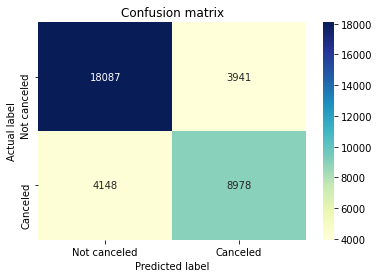


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.813447  0.821091  0.817251
Canceled       0.694945  0.683986  0.689422


f1 score mean: 0.7533367914615083
Accuracy: 0.7698981623712806



In [103]:
perceptron_f1, perceptron_acc = model_stats(X_val, y_val, perceptron_gs.best_estimator_)

In [104]:
perceptron_gs.score(X_train, y_train)

0.7542905853381322

Vediamo che l'accuratezza sul training è simile a quella sul validation, quindi il modello non soffre di overfitting.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [105]:
confidence_interval(y_val.shape[0], perceptron_f1)

(0.74880301923016, 0.7578152008734235)

In [106]:
confidence_interval(y_val.shape[0], perceptron_acc)

(0.7654688867996412, 0.7742684558932048)

In [107]:
stats["Perceptron"] = {"f1_score" : perceptron_f1, "accuracy" : perceptron_acc}

Il modello sebbene sia abbastanza semplice, presenta un'accuratezza all'interno dell'intervallo 0.765 - 0.774 con il 95% di confidenza. \\
Notiamo però che la recall per la classe 1 (Canceled) è molto bassa. \\
Non possiamo attribuire il motivo della bassa recall al fatto che le classi sono sbilanciate (all'interno del dataset di train) in quanto ho effettuato il bilanciamento. \\
Verifichiamo se con altri algoritmi la situazione migliora.

## Logistic Regression

Il secondo algoritmo che provo è la Regressione Logistica. \\
Anche con questo algoritmo ho effettuato varie prove per il bilanciamento come spiegato per il Perceptron. \\
Per la regressione logistica andrò a provare gli stessi iperparametri riguardanti la regolarizzazione. Questa volta in minor cardinalità in quanto i tempi di computazione sono già molto elevati a causa del grande numero di istanze del training set.

In [108]:
logregr_model = Pipeline([
    ("transformer", transformer),
    ("logreg", LogisticRegression(random_state=42, solver="saga"))
])
logregr_grid = [
        {
            "logreg__penalty" : ["none"],
            #"logreg__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        },
        {
            "logreg__penalty" : ["l1", "l2"],
            "logreg__C" :  np.logspace(-3,1, 5),
            #"logreg__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        },
        {
            "logreg__penalty" : ["elasticnet"],
            "logreg__C" :  np.logspace(-3,1, 5),
            "logreg__l1_ratio" : [0.1, 0.5, 0.7],
            #"logreg__class_weight" : [{0:1, 1:2}, {0:0.1, 1:1}, "balanced", None]
        }
]
logregr_gs = GridSearchCV(logregr_model, logregr_grid, cv=skf, refit=True)
logregr_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [109]:
logregr_gs.best_params_

{'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'elasticnet'}

Anche nella Regressione Logistica viene scelta l'ElasticNet. \\
Però, qui prevale la regolarizzazione l2, infatti si nota l'iperparametro `l1_ratio` che vale 0.1.
Per `C` che è l'inverso del peso della regolarizzazione (in modo da rappresentarlo in modo simile a quanto accade in SVM) vale 0.1, quindi si applica una regolarizzazione media, più forte di quella di default. 

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         17938      4090
Canceled              2760     10366


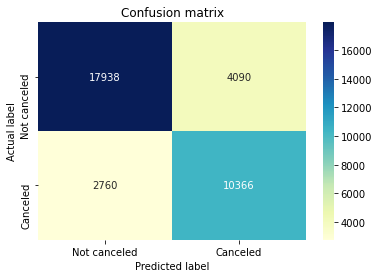


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.866654  0.814327  0.839676
Canceled       0.717072  0.789730  0.751650


f1 score mean: 0.7956628510128092
Accuracy: 0.8051430847129771



In [110]:
logregr_f1, logregr_acc = model_stats(X_val, y_val, logregr_gs.best_estimator_)

In [111]:
logregr_gs.score(X_train, y_train)

0.8033529077476795

Vediamo che l'accuratezza sul training è simile a quella sul validation, quindi il modello non soffre di overfitting.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [112]:
confidence_interval(y_val.shape[0], logregr_f1)

(0.7914155607420779, 0.7998455287614538)

In [113]:
confidence_interval(y_val.shape[0], logregr_acc)

(0.8009692358380629, 0.809250249308033)

In [114]:
stats["Logistic Regression"] = {"f1_score" : logregr_f1, "accuracy" : logregr_acc}

Con la regressione Logistica otteniamo un'accuratezza migliore del Percepton. \\
Inoltre, si nota anche un miglioramento nell'f1 score, infatti si notano miglioramenti sia per quanto riguarda la precision che per la recall in entrambe le classi.

## SVM

Fin'ora ho utilizzato modelli i quali individuavano soluzioni per dati linearmente separabili. \\
Perciò ora provo SVM che, grazie alla possibilità di utilizzare Kernel, consente di mappare i dati in uno spazio con maggiori dimensioni dove i dati possano essere separati linearmente (in modo migliore, si spera, rispetto ai precedenti modelli). \\
Il dataset, nonostante l'undersampling, è ancora molto elevato come numero di istanze, quindi applicare qualsiasi tecnica che sfrutta i kernel porterebbe a tempi di calcolo troppo elevati (per via del costo computazionale quadratico rispetto al numero delle istanze di training), perciò approssimo il kernel attraverso Nystroem.

Utilizzerò il filtro Nystroem offerto sempre da scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html

Quindi, dopo aver applicato la trasformazione ai dati (ColumnTransformer) passerò i dati a Nystroem, il quale creerà una matrice kernel approssimata, che verrà fornita in input ad un modello SVM Lineare (*LinearSVC* sempre offerto da scikit-learn e presente nella doc di Nystroem: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

I kernel testati sono: 
- Polinomiale: $ K(\mathbf{x},\mathbf{y}) = \left(\mathbf{x}\cdot\mathbf{y}+c\right)^d $ \\
$d$ e $c$ sono parametri del kernel, in particolare $d$ è il grado del polinomio
- Radial Basis Function (RBF): $ K(\mathbf{x},\mathbf{y}) = exp(-\gamma||\mathbf{x}-\mathbf{y}||^2) $ , con $ \gamma = \frac{1}{2\sigma^2} $

Inoltre, ho aggiunto alla grid della GridSearchCV anche l'ottimizzazione del parametro per la penalità data alle classificazioni errate `C`.

In [115]:
svm_model = Pipeline([
    ("transformer", transformer),
    ("nystroem", Nystroem(random_state=42, n_components=300)),
    ("linear_svm", LinearSVC(random_state=42, dual=False))
])

svm_grid = [
        {
            "nystroem__kernel" : ["poly"],
            #"nystroem__degree" : [2, 3, 4, 5, 6],
            "nystroem__degree" : [2, 3],
            "linear_svm__C" : np.logspace(-1, 1, 3)
        },
        {
            "nystroem__kernel" : ["rbf"],
            #"nystroem__gamma" : np.logspace(-3, 1, 5),
            #"nystroem__gamma" : np.logspace(-2, 1, 5),
            #"linear_svm__C" : np.logspace(-3, 1, 5)
            "linear_svm__C" : np.logspace(-1, 1, 3)
        }
]
svm_gs = GridSearchCV(svm_model, svm_grid, cv=skf, refit=True)
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [116]:
svm_gs.best_params_

{'linear_svm__C': 10.0, 'nystroem__kernel': 'rbf'}

Il kernel selezionato dalla GridSearchCV è l'rbf, con penalità C = 10, quindi meno forte rispetto a quella di default.

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         18417      3611
Canceled              2313     10813


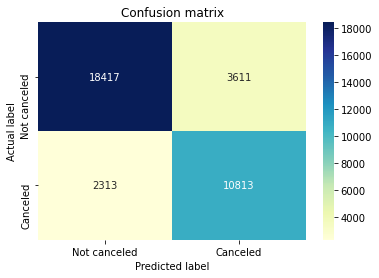


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.888423  0.836072  0.861453
Canceled       0.749653  0.823785  0.784973


f1 score mean: 0.8232128021552775
Accuracy: 0.8314843261079821



In [117]:
svm_f1, svm_acc = model_stats(X_val, y_val, svm_gs.best_estimator_)

In [118]:
svm_gs.score(X_train, y_train)

0.8326955862852813

Vediamo che l'accuratezza sul training è simile a quella sul validation, quindi il modello non soffre di overfitting.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [119]:
confidence_interval(y_val.shape[0], svm_f1)

(0.819189592894048, 0.8271653782806686)

In [120]:
confidence_interval(y_val.shape[0], svm_acc)

(0.8275350975228829, 0.8353611139442055)

In [121]:
stats["SVM"] = {"f1_score" : svm_f1, "accuracy" : svm_acc}

Sfruttando il kernel rbf e grazie al fatto che SVM cerca l'iperpiano migliore tra i vari possibili, abbiamo ottenuto un miglioramento sia per quanto riguarda l'accuratezza, sia per quanto riguarda l'f1 score. \\
Si nota infatti un aumento della precision e della recall per entrambe le classi.

## Decision Tree

Ora proverò i Decision Tree. \\
Ho pensato di utilizzare i decision tree in quanto il dataset, e in generale il problema che sto cercando di affrontare, si presta bene secondo me ad un modello basato su alberi (Decision Tree, Random Forest, XGBoost che proverò dopo) per il motivo che ciò che porta a cancellare una prenotazione o a rispettarla sono un'insieme di scelte; scelte che in molti casi hanno patterns comuni rappresentabili schematicamente ad albero.

Al fine di estrapolare un modello abbastanza ottimizzato, effettuerò anche qui una GridSearchCV sui seguenti parametri:
- `max_depth`: profondità massima dell'albero.
- `min_samples_split`: numero minimo di istanze richieste all'interno del nodo per poter effettuare lo split.

In [122]:
decision_tree_model = Pipeline([
      ("transformer", transformer),
      ("decisiontree", DecisionTreeClassifier(random_state=42))
])
decision_tree_grid = {
    "decisiontree__max_depth" : [5, 10, 15, 20, 100, 200, None],
    "decisiontree__min_samples_split" : [2, 5, 10, 50, 100, 200, 500]
}
decision_tree_gs = GridSearchCV(decision_tree_model, decision_tree_grid, cv=skf, refit=True)
decision_tree_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [123]:
decision_tree_gs.best_params_

{'decisiontree__max_depth': 15, 'decisiontree__min_samples_split': 2}

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         18846      3182
Canceled              2446     10680


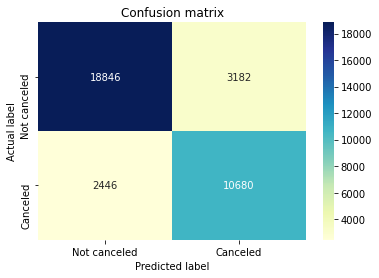


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.885121  0.855547  0.870083
Canceled       0.770452  0.813652  0.791463


f1 score mean: 0.8307729874404013
Accuracy: 0.8399044205495818



In [124]:
decision_tree_f1, decision_tree_acc = model_stats(X_val, y_val, decision_tree_gs.best_estimator_)

In [125]:
decision_tree_gs.score(X_train, y_train)

0.8698996021973858

Vediamo che l'accuratezza sul training è di poco maggiore rispetto a quella sul validation, quindi il modello non soffre di overfitting, però siamo al limite.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [126]:
confidence_interval(y_val.shape[0], decision_tree_f1)

(0.826817265446111, 0.8346564241378289)

In [127]:
confidence_interval(y_val.shape[0], decision_tree_acc)

(0.8360340052975351, 0.8437005549719441)

In [128]:
decision_tree_depth = decision_tree_gs.best_estimator_.named_steps["decisiontree"].get_depth()
decision_tree_leaves = decision_tree_gs.best_estimator_.named_steps["decisiontree"].get_n_leaves()
print(f"Depth: {decision_tree_depth}, Leaves: {decision_tree_leaves}")

Depth: 15, Leaves: 1241


L'albero creato attraverso GridSearchCV presenta 15 livelli di profondità e 1241 foglie.

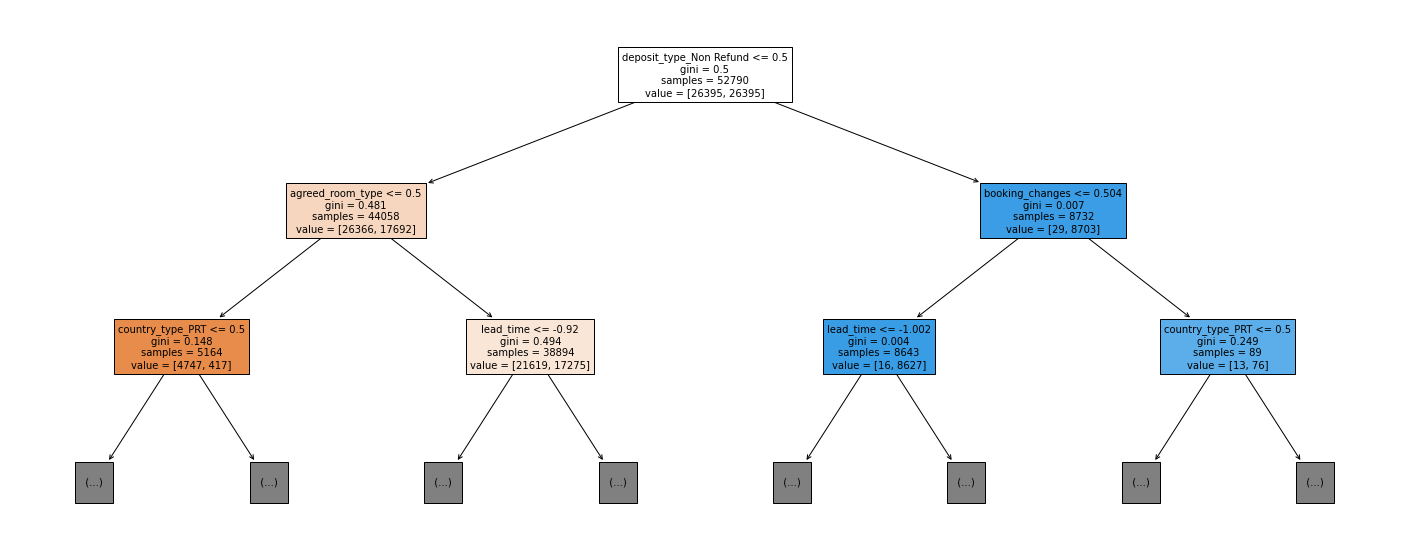

In [129]:
plt.figure(figsize=(25,10))
plot_tree(decision_tree_gs.best_estimator_.named_steps["decisiontree"], feature_names=labels, max_depth=2, filled=True);

In [130]:
stats["Decision Tree"] = {"f1_score" : decision_tree_f1, "accuracy" : decision_tree_acc}

L'utilizzo del metodo DecisionTree non ha portato grandi miglioramenti rispetto alla soluzione basato su SVM, anche se questo modello impiega minor tempo per essere allenato. \\
La differenza tra i due modelli in termini di accuratezza ed f1 score è talmente piccola da richiedere metodi statistici per poter essere confrontate con confidenza.

## Random Forest

Visto che a lezione si è nominato **Random Forest** e **XGBoost** come metodi per ridurre l'errore combinando più alberi semplici creati sullo stesso dataset (*Ensemble Learning*), andrò a creare un semplice modelli per vedere se l'accuratezza migliora.

Il primo modello di Ensemble Learning che provo è **Random Forest** il quale utilizza per ciascun albero sottoinsiemi di dati non disguinti e sottoinsiemi casuali di variabili di input. \\ 
Come fatto per i modelli precedenti ottimizzo gli iperparametri attraverso la GridSearchCV:
- `n_estimators`: è il numero di alberi all'interno della foresta.
- `max_depth`: profondità massima degli alberi.
- `min_samples_split`: numero minimo di istanze all'interno di un nodo per poter effettuare lo split.


In [131]:
random_forest_model = Pipeline([
      ("transformer", transformer),
      ("randomforest", RandomForestClassifier(random_state=42))
])
random_forest_grid = {
    'randomforest__n_estimators': [10, 50, 100, 150],
    "randomforest__max_depth" : [15, 20],
    "randomforest__min_samples_split" : [20, 50, 100, 200, 500]
}

random_forest_gs = GridSearchCV(random_forest_model, random_forest_grid, cv=skf, refit=True)
random_forest_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [132]:
random_forest_gs.best_params_

{'randomforest__max_depth': 20,
 'randomforest__min_samples_split': 20,
 'randomforest__n_estimators': 150}

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         19290      2738
Canceled              2127     10999


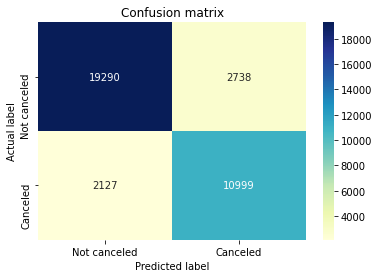


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.900686  0.875704  0.888019
Canceled       0.800684  0.837955  0.818896


f1 score mean: 0.8534576069406568
Accuracy: 0.8616089207487057



In [133]:
random_forest_f1, random_forest_acc = model_stats(X_val, y_val, random_forest_gs.best_estimator_)

In [134]:
random_forest_gs.score(X_train, y_train)

0.8857169918545179

Vediamo che l'accuratezza sul training è simile a quella sul validation, quindi il modello non soffre di overfitting.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [135]:
confidence_interval(y_val.shape[0], random_forest_f1)

(0.8497220551134971, 0.8571159160998353)

In [136]:
confidence_interval(y_val.shape[0], random_forest_acc)

(0.8579596337788318, 0.8651791837076205)

In [137]:
stats["Random Forest"] = {"f1_score" : random_forest_f1, "accuracy" : random_forest_acc}

Sembra che l'impiego di Random Forest abbia portato dei miglioramenti sia nell'accuratezza sia nell'f1 score. \\
Ovviamente il tutto verrà valutato attraverso metodi statistici.

## XGBoost

Ora provo il secondo modello di Ensemble Learning: **XGBoost**. \\
Applico una GridSearchCV sui seguenti iperparametri:
- `n_estimators`: è il numero di alberi.
- `max_depth`: profondità massima degli alberi.
- `eta`: step size, utilizzato anche per prevenire l'overfitting .
- `alpha`: è il peso della regolarizzazione l1, utilizzata per prevenire l'overfitting.

In [138]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html
xgb_model = Pipeline([
      ("transformer", transformer),
      ("xgb", XGBClassifier(nthread=8, booster = 'gbtree', objective="binary:logistic", random_state=42))
])

xgb_grid = {
    "xgb__n_estimators" : [150, 300],
    "xgb__max_depth" : [6, 7],
    "xgb__eta" : [0.002, 0.25],
    "xgb__alpha" : [10]
}

xgb_gs = GridSearchCV(xgb_model, xgb_grid, cv=skf, refit=True)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [139]:
xgb_gs.best_params_

{'xgb__alpha': 10,
 'xgb__eta': 0.002,
 'xgb__max_depth': 7,
 'xgb__n_estimators': 300}

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         18993      3035
Canceled              1937     11189


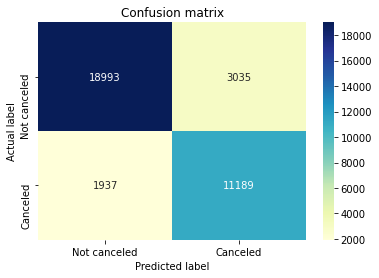


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.907453  0.862221  0.884259
Canceled       0.786628  0.852430  0.818208


f1 score mean: 0.8512337266117588
Accuracy: 0.8585651703931274



In [140]:
xgb_f1, xgb_acc = model_stats(X_val, y_val, xgb_gs.best_estimator_)

In [141]:
xgb_gs.score(X_train, y_train)

0.8895813601060807

Vediamo che l'accuratezza sul training è di poco maggiore rispetto a quella sul validation, quindi il modello non soffre di particolari problemi di overfitting, però siamo al limite. 

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [142]:
confidence_interval(y_val.shape[0], xgb_f1)

(0.8474753328968607, 0.854915363653167)

In [143]:
confidence_interval(y_val.shape[0], xgb_acc)

(0.8548831944909397, 0.8621687874487024)

In [144]:
stats["XGBoost"] = {"f1_score" : xgb_f1, "accuracy" : xgb_acc}

XGBoost presenta accuratezza ed f1 score molto simili a quelli ottenuti attraverso Random Forest.

## Multi-layer Percepton

Come ultimo modello provo il Multi-layer Perceptron, il quale consente di creare più modelli lineari disposti a strati sfruttando anche funzioni di attivazione per creare la "non linearità" (semplici reti neurali in scikit-learn). \\
Questo algoritmo non è stato molto approfondito a lezione, quindi ne creerò una versione semplice.

Effettuo, come solito, una GridSearchCV:
- `hidden_layer_sizes`: è il numero di neuroni all'interno dei layer nascosti.

In [145]:
mlp_model = Pipeline([
      ("transformer", transformer),
      ("mlp", MLPClassifier(activation="relu", batch_size=50, random_state=42))
])
mlp_grid = {
    "mlp__hidden_layer_sizes" : [64, (64,32)],
    #"mlp__batch_size" : [50, 100]
}
mlp_gs = GridSearchCV(mlp_model, mlp_grid, cv = skf, refit=True)
mlp_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_canceled',
                                                                          'booking_changes',
                                                    

In [146]:
mlp_gs.best_params_

{'mlp__hidden_layer_sizes': 64}

La GridSearchCV ha selezionato il modello con un solo livello nascosto da 64 neuroni.

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         19166      2862
Canceled              2326     10800


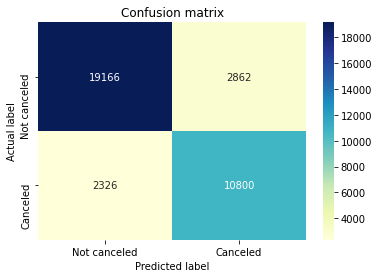


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.891774  0.870074  0.880790
Canceled       0.790514  0.822794  0.806331


f1 score mean: 0.8435608171239976
Accuracy: 0.85242077715196



In [147]:
mlp_f1, mlp_acc = model_stats(X_val, y_val, mlp_gs.best_estimator_)

In [148]:
mlp_gs.score(X_train, y_train)

0.8657321462398182

Vediamo che l'accuratezza sul training è simile a quella sul validation, quindi il modello non soffre di overfitting.

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [149]:
confidence_interval(y_val.shape[0], mlp_f1)

(0.8397257826392643, 0.8473207717303879)

In [150]:
confidence_interval(y_val.shape[0], mlp_acc)

(0.8486745398356187, 0.85608999838336)

In [151]:
stats["Multi Layer Perceptron"] = {"f1_score" : mlp_f1, "accuracy" : mlp_acc}

Non abbiamo ottenuto un miglioramento rispetto ai modelli precedenti.

## Prova Rete Neurale

Ora andrò ad effettuare una prova con una semplice rete neurale come fatto durante l'ultima lezione di laboratorio.

**Questa non verrà presa in considerazione nella valutazione dei modelli per la pochissima esperienza sull'argomento.**

In [152]:
!pip install tensorflow

In [153]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Trasformo la variabile di output per poterla utilizzare con Keras.

In [154]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Ottengo il numero di variabili di input.

In [155]:
input_vars = len(labels)
input_vars

50

Creo il modello.

In [156]:
nn_model = Sequential([
      Dense(128, activation="relu", input_dim=input_vars),
      Dense(64, activation="relu"),
      Dense(2, activation="softmax")
])

In [157]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 14,914
Trainable params: 14,914
Non-trainable params: 0
_________________________________________________________________


Il modello presenta 14914 parametri:
- 50 * 128 pesi + 128 bias 
- 128 * 64 pesi + 64 bias
- 64 * 2 pesi + 2 bias

Compilo il modello per costruire il grafo computazione su TensorFlow.

In [158]:
nn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Trasformo i dati di train applicando il ColumnTransformer e converto tutti i dati in `float32` per poter essere utilizzati da Keras.

In [159]:
nn_X_train = transformer.fit_transform(X_train).astype("float32")
nn_X_val = transformer.transform(X_val).astype("float32")

In [160]:
fit_history = nn_model.fit(nn_X_train, y_train_cat, batch_size=100, epochs=20);

Epoch 1/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.8140
Epoch 2/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8288
Epoch 3/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8361
Epoch 4/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8395
Epoch 5/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8429
Epoch 6/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8451
Epoch 7/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8472
Epoch 8/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3128 - accuracy: 0.8496
Epoch 9/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8508
Epoch 10/20
528/528 [==============================] - 1s 2ms/step - loss: 0.3061 - accuracy: 0.8528

In [161]:
nn_model.evaluate(nn_X_val, y_val_cat)

1099/1099 [==============================] - 1s 998us/step - loss: 0.3220 - accuracy: 0.8506


[0.32195308804512024, 0.8505717515945435]

============= Confusion matrix =============

              Not canceled  Canceled
Not canceled         18797      3231
Canceled              2022     11104


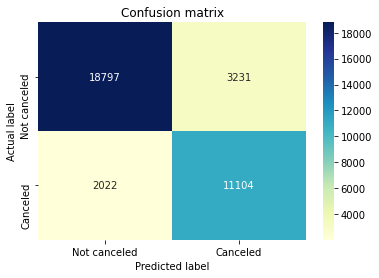


============= Report scores =============
              precision    recall  f1 score
Not canceled   0.902877  0.853323  0.877401
Canceled       0.774608  0.845955  0.808711
1099/1099 [==============================] - 1s 987us/step - loss: 0.3220 - accuracy: 0.8506


f1 score mean: 0.8430557599201104
Accuracy: 0.8505717515945435



In [162]:
nn_f1, nn_acc = model_stats(nn_X_val, y_val, nn_model, nn=True)

Visualizzo gli intervalli di f1 score e dell'accuratezza con confidenza del 95%

In [163]:
confidence_interval(y_val.shape[0], nn_acc)

(0.8468066142300786, 0.8542602769498725)

In [164]:
confidence_interval(y_val.shape[0], nn_f1)

(0.8392157953914581, 0.8468207549428242)

Non abbiamo ottenuto miglioramenti significativi, sopratutto per l'inesperienza con le reti neurali. 

# Valutazione e selezione dei modelli di classificazione

Dopo aver effettuato prove con 7 (+1) modelli diversi, vado a confrontarli e a selezionare il migliore.

Abbiamo già verificato che i modelli non soffrono di overfitting, perciò possiamo procedere all'analisi. \\
Questi sono le statistiche principali dei modelli testati:

In [165]:
models_stats = pd.DataFrame(stats).T
models_stats

,f1_score,accuracy
Perceptron,0.753337,0.769898
Logistic Regression,0.795663,0.805143
SVM,0.823213,0.831484
Decision Tree,0.830773,0.839904
Random Forest,0.853458,0.861609
XGBoost,0.851234,0.858565
Multi Layer Perceptron,0.843561,0.852421


Si nota che il Perceptron, essendo il modello più semplice, è quello che ottiene le performance peggiori seguita dalla Regressione Logistica.
Dopodichè abbiamo SVM e DecisionTree che ottengono prestazioni simili a metà classifica. \\
Infine, abbiamo i 3 modelli con accuratezza migliori che sono:
- Multi Layer Perceptron
- XGBoost
- Random Forest

Osservando gli score, sembra che il migliore tra questi sia Random Forest. Però occorre verificarlo statisticamente, in quanto, ad esempio la differenza con XGBoost è veramente piccola. Perciò è necessario verificare se la differenza tra le accuratezze e f1 score dei modelli è statisticamente significativa.

Utilizzerò una confidenza del 95%.

In [166]:
compare_two_model(models_stats.loc["Random Forest", "accuracy"], models_stats.loc["XGBoost", "accuracy"], y_val.shape[0], y_val.shape[0])

(-0.0020846235588742957, 0.008172124270030785)

In [178]:
compare_two_model(models_stats.loc["Random Forest", "f1_score"], models_stats.loc["XGBoost", "f1_score"], y_val.shape[0], y_val.shape[0])

(-0.003020721702616514, 0.007468482360412466)

Come vediamo all'interno di entrambi gli intervalli vi è anche lo 0, perciò possiamo dedurre che la differenza tra i due modelli (Random Forest e XGBoost) non è statisticamente significativa.

In [167]:
compare_two_model(models_stats.loc["Random Forest", "accuracy"], models_stats.loc["Multi Layer Perceptron", "accuracy"], y_val.shape[0], y_val.shape[0])

(0.004013434570176595, 0.014362852623314786)

In [179]:
compare_two_model(models_stats.loc["Random Forest", "f1_score"], models_stats.loc["Multi Layer Perceptron", "f1_score"], y_val.shape[0], y_val.shape[0])

(0.004596938103149328, 0.015196641530169076)

Qui invece notiamo che la differenza tra Random Forest e Multi Layer Perceptron è statisticamente significativa, quindi Random Forest è migliore. (rispetto al multi-layer perceptron)

Vediamo che i 2 modelli migliori sono: **Random Forest** e **XGBoost**. \\
Entrambi i modelli ottengono buoni score sia per quanto riguarda l'accuratezza, sia per quanto riguarda l'f1 score (quindi precision e recall).

Ovviamente si potrebbero utilizzare tecniche per aumentare la precision o la recall di una delle due classi(come ad esempio utilizzare i pesi delle classi durante il training), ma questo dipende dalla situazione in cui ci troviamo. \\
Non sapendo bene cosa il cliente desidera ottimizzare, ho deciso di mantenermi in una situazione neutra e cercare di ottimizzare l'f1 score (e quindi non concentrarmi specificamente su precision o recall).

## Conferma valutazione sul test set

Verifichiamo se sono i modelli migliori anche sul Test set.

In [197]:
perceptron_gs.score(X_test, y_test)

0.7748954688966635

In [198]:
logregr_gs.score(X_test, y_test)

0.8088574110418978

In [171]:
svm_gs.score(X_test, y_test)

0.8314702619677447

In [172]:
decision_tree_gs.score(X_test, y_test)

0.8383821145148903

In [173]:
mlp_gs.score(X_test, y_test)

0.850584520863555

In [174]:
random_forest_test_score = random_forest_gs.score(X_test, y_test)
random_forest_test_score

0.8623602696475808

In [175]:
xgb_test_score = xgb_gs.score(X_test, y_test)
xgb_test_score

0.8587763461046164

Anche sul test set i due modelli migliori sono Random Forest e XGBoost, quindi verifichiamo se anche sul test set la piccola differenza di accuratezza non è statisticamente significativa.

In [176]:
compare_two_model(random_forest_test_score, xgb_test_score, y_test.shape[0], y_test.shape[0])

(-0.005285459350600366, 0.012453306436529246)

Vediamo che anche qui le differenze di score presenti non sono statisticamente significative, perciò i due modelli sono equivalenti.

In [201]:
random_forest_f1_score_test = f1_score(y_test, random_forest_gs.predict(X_test))
xgb_f1_score_test = f1_score(y_test, xgb_gs.predict(X_test))

random_forest_f1_score_test, xgb_f1_score_test

(0.8207180171168168, 0.819657840252806)

Come vediamo gli f1 score sono buoni anche sul test set.

In [202]:
compare_two_model(random_forest_f1_score_test, xgb_f1_score_test, y_test.shape[0], y_test.shape[0])

(-0.008772946479211176, 0.010893300207232838)

Confermiamo inoltre che la piccola differenza tra gli f1 score presenti tra Random Forest e XGBoost non è statisticamente significativa, con confidenza sempre del 95%.

# Analisi modello migliore

Grazie alla valutazione abbiamo individuato i modelli migliori: **Random Forest** e **XGBoost**. \\
Ora andiamo ad interpretare la conoscenza appresa attraverso l'analisi dei parametri.

## Random Forest

In [177]:
pd.Series(random_forest_gs.best_estimator_.named_steps["randomforest"].feature_importances_, index=labels).sort_values(ascending=False)[:10]

lead_time                      0.118940
deposit_type_Non Refund        0.108243
country_type_PRT               0.093820
total_of_special_requests      0.069947
deposit_type_No Deposit        0.069478
agreed_room_type               0.058041
adr                            0.053614
market_segment_Online TA       0.046769
required_car_parking_spaces    0.045074
country_type_European          0.034658
dtype: float64

Random Forest considera il lead_time, il tipo di deposito senza risarcimento, il fatto che il paese di provenienza sia il Portogallo come elementi principali per determinare se una prenotazione verrà cancellata o meno. \\
Inoltre, importante è anche il numero di richieste speciali effettuate e l'adr.

Il modello rispecchia le osservazioni fatte durante l'analisi dei dati e quindi ha un comportamento che è allineato con ciò che accade nella realtà. Ad esempio il fatto che se prenotiamo troppo presto una vacanza abbiamo un rischio più alto di imprevisti e quindi una maggior probabilità di cancellare la vacanza, oltre al fatto che chi proviene dall'estero è più portato a rispettare la prenotazione.
Tutti questi aspetti si ritrovano all'interno dell'importanza delle feature ed erano già stati previsti durante l'analisi dei dati.

In [189]:
def plot_feature_importance(importance,labels,model_type):
  importances = pd.DataFrame(data = {'labels':labels,'feature_importance':importance})
  importances.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  plt.figure(figsize=(10,15))
  sns.barplot(x=importances['feature_importance'], y=importances['labels'])
  plt.title(model_type)
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

Possiamo apprezzare l'importanza delle varie features anche attraverso un grafico a barre.

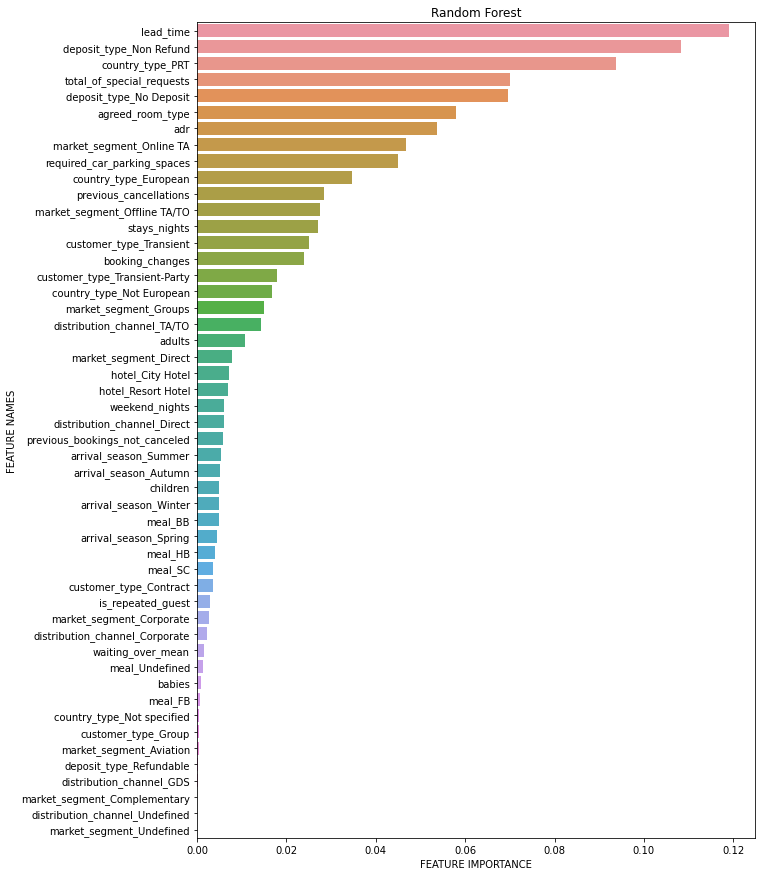

In [190]:
plot_feature_importance(random_forest_gs.best_estimator_.named_steps["randomforest"].feature_importances_, labels, "Random Forest")

Si può vedere che la previsione è influenzata poco dal fatto che ci siano bambini piccoli (`babies`) oppure dal fatto che la prenotazione possa essere rimborsata. \\
Anche la variabile introdotta `waiting_over_mean` non è molto importante per il Random Forest, anche se ha delle performance sicuramente migliori rispetto a se avessimo lasciato days_in_waiting_list.

## XGBoost

In [203]:
pd.Series(xgb_gs.best_estimator_.named_steps["xgb"].feature_importances_, index=labels).sort_values(ascending=False)[:10]

deposit_type_Non Refund          0.620000
required_car_parking_spaces      0.074501
agreed_room_type                 0.059260
market_segment_Online TA         0.054007
country_type_PRT                 0.024239
previous_cancellations           0.019944
customer_type_Transient          0.013946
market_segment_Direct            0.012555
total_of_special_requests        0.011781
customer_type_Transient-Party    0.006953
dtype: float32

XGBoost come si può vedere affida un'importanza molto alta al tipo di deposito, lasciando per le altre importanze molto più piccole. \\
Dopo aver condotto l'analisi sui dati, e avendo confrontato con uno scenario reale, questa importanza, così elevata, data al tipo di deposito "Senza rimborso", non mi fa dire con certezza che questo sia un modello molto stabile, sopratutto su dati nuovi, fuori dal dataset, in contesti reali.

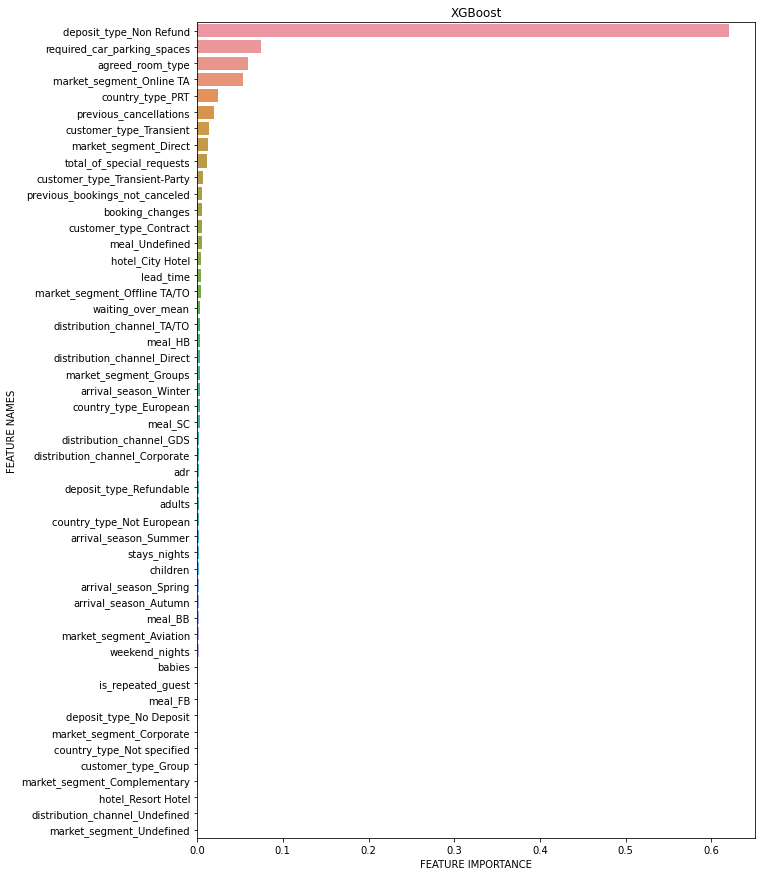

In [204]:
plot_feature_importance(xgb_gs.best_estimator_.named_steps["xgb"].feature_importances_, labels, "XGBoost")

Come vediamo XGBoost fa grande affidamento su pochissime variabili, mentre avevamo visto prima che Random Forest fa affidamento su molte più variabili e quindi sembra che prenda decisioni basandosi su molti più aspetti (in modo più "democratico"), come avviene nella realtà. \\

Perciò tra i due modelli, scelgo come miglior modello il **Random Forest**.

# Conclusioni

Questo progetto ha presentato inizialmente delle difficoltà dovute al grande numero di features presenti e alla loro distribuzione: molti valori a zero, molti outliers... Questo mi ha concesso di mettere in gioco e provare alcune delle tecniche viste a lezione per effettuare l'elaborazione delle features e il data cleaning. \\
Quindi, sono molto soddisfatto del lavoro fatto in quanto mi ha concesso di condurre data cleaning, analisi esplorativa, elaborazione delle features e modellazione da zero, su un problema che non avevo mai affrontato. \\
Inoltre, ho ottenuto anche score in linea con le soluzioni proposte su Kaggle. Attualmente è presente solo un ragazzo che ha ottenuto score molto alti, però ha utilizzato tecniche che non rispettavano l'origine e il significato dei dati, come ad esempio trattare le variabili categoriche nominali come se fossero ordinali ecc.., oltre che a condurre ragionamenti, che a mio parere lavorano molto bene sul dataset, ma non generalizzavano bene nella realtà. \\

In conclusione, sono molto soddisfatto del risultato e degli score ottenuti.